In [79]:
import pandas as pd
import requests
import json
import sqlite3
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import re as re
import seaborn as sns
from ast import literal_eval

In [80]:
con= sqlite3.connect('test')

In [81]:
df = pd.read_csv("complete_anilist.csv")
df

id   type format    status  seasonYear    source  \
0           1  ANIME     TV  FINISHED      1998.0  ORIGINAL   
1           5  ANIME  MOVIE  FINISHED      2001.0  ORIGINAL   
2           6  ANIME     TV  FINISHED      1998.0     MANGA   
3           7  ANIME     TV  FINISHED      2002.0  ORIGINAL   
4           8  ANIME     TV  FINISHED      2004.0     MANGA   
...       ...    ...    ...       ...         ...       ...   
18386  186761  ANIME  MOVIE  FINISHED         NaN     OTHER   
18387  186762  ANIME  MOVIE  FINISHED         NaN     OTHER   
18388  186763  ANIME  MOVIE  FINISHED         NaN     OTHER   
18389  186764  ANIME  MOVIE  FINISHED      2024.0       NaN   
18390  186790  ANIME  MOVIE  FINISHED         NaN     OTHER   

                                                  genres  popularity  \
0             ['Action', 'Adventure', 'Drama', 'Sci-Fi']      380694   
1               ['Action', 'Drama', 'Mystery', 'Sci-Fi']       70431   
2      ['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...      136780   
3         ['Action', 'Drama', 'Mystery', 'Supernatural']       18663   
4               ['Adventure', 'Fantasy', 'Supernatural']        2614   
...                                                  ...         ...   
18386                                ['Comedy', 'Drama']           3   
18387                                         ['Comedy']           4   
18388                               ['Drama', 'Fantasy']           4   
18389                                        ['Fantasy']         138   
18390                                        ['Fantasy']           5   

                                                    tags  \
0      [{'name': 'Space'}, {'name': 'Crime'}, {'name'...   
1      [{'name': 'Terrorism'}, {'name': 'Primarily Ad...   
2      [{'name': 'Guns'}, {'name': 'Fugitive'}, {'nam...   
3      [{'name': 'Conspiracy'}, {'name': 'Police'}, {...   
4      [{'name': 'Shounen'}, {'name': 'Spearplay'}, {...   
...                                                  ...   
18386                                                 []   
18387                                                 []   
18388                              [{'name': 'Dragons'}]   
18389  [{'name': 'Virtual World'}, {'name': 'Female P...   
18390                                                 []   

                                           title.english  \
0                                           Cowboy Bebop   
1      Cowboy Bebop: The Movie - Knockin' on Heaven's...   
2                                                 Trigun   
3                                     Witch Hunter ROBIN   
4                                 Beet the Vandel Buster   
...                                                  ...   
18386                                                NaN   
18387                                                NaN   
18388                                                NaN   
18389                                                NaN   
18390                                                NaN   

                                 title.romaji  
0                                Cowboy Bebop  
1             Cowboy Bebop: Tengoku no Tobira  
2                                      TRIGUN  
3                          Witch Hunter ROBIN  
4                              Bouken Ou Beet  
...                                       ...  
18386                          Ban Ye Ji Jiao  
18387                   Cao Chong Cheng Xiang  
18388                            Diao Long Ji  
18389  SINoALICE: Ichiban Saigo no Monogatari  
18390           Chiisana Jam to Goblin no Opp  

[18391 rows x 11 columns]

In [82]:
my_df = pd.read_csv('my_anilist.csv')
my_df

mediaId                  media.title.english
0       21711                              91 Days
1        9776                            A-Channel
2        8101                             Hen Zemi
3       20785                         Absolute Duo
4       21823  ACCA: 13-Territory Inspection Dept.
...       ...                                  ...
1280   112153         Pokémon Journeys: The Series
1281   103301                               ENDRO!
1282   103638           Case File nº221: Kabukicho
1283   103222          Magical Girl Spec-Ops Asuka
1284   104679                          Chidori RSC

[1285 rows x 2 columns]

In [83]:
my_df.isnull().sum()

mediaId                0
media.title.english    0
dtype: int64

In [84]:
def clean_list(df: pd.DataFrame) -> pd.DataFrame:
    df = df[(df.format != "MOVIE") & (df.format != "SPECIAL") & (df.format != "MUSIC") & (df.format != "TV_SHORT") & (df.format.notnull())] #remove unnecesary formats
    df['title.english'] = df['title.english'].fillna(df['title.romaji'])  #clean english title
    df_2 = df.dropna(subset=['seasonYear'])
    df_2 = df_2.drop(['title.romaji','status','type'],axis=1) #drop romaji title
    df_2['source'] = df_2['source'].fillna('OTHER') #replace unknown source with "OTHER"
    df_2['seasonYear'] = df_2['seasonYear'].astype(int)
    df_2.rename(columns={'title.english' : 'Title'}, inplace=True)    
    df_2.rename(columns={'seasonYear' : 'Year'}, inplace=True)
    df_2.columns = df_2.columns.str.capitalize()
    df_3 = df_2[(df_2['Year'] > 2004) & (df_2['Year'] <= 2024)]
    return df_3


In [86]:
df_1 = clean_list(df)

C:\Users\Leolion023\AppData\Local\Temp\ipykernel_132684\3053194435.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title.english'] = df['title.english'].fillna(df['title.romaji'])  #clean english title


In [87]:
#df_1.rename(columns={'title.english' : 'Title'}, inplace=True)
df_1

Id Format  Year       Source  \
5          15     TV  2005        MANGA   
6          16     TV  2005        MANGA   
16         27     TV  2005  LIGHT_NOVEL   
30         50     TV  2005        MANGA   
45         65     TV  2005        MANGA   
...       ...    ...   ...          ...   
18283  185463    ONA  2023     ORIGINAL   
18287  185541    ONA  2024     ORIGINAL   
18293  185642    ONA  2023     ORIGINAL   
18294  185644     TV  2024        OTHER   
18299  185669    ONA  2024     ORIGINAL   

                                                  Genres  Popularity  \
5                         ['Action', 'Comedy', 'Sports']       29079   
6        ['Comedy', 'Drama', 'Romance', 'Slice of Life']       50455   
16     ['Action', 'Drama', 'Horror', 'Sci-Fi', 'Super...       23424   
30                 ['Comedy', 'Romance', 'Supernatural']       21661   
45                         ['Action', 'Comedy', 'Drama']       14749   
...                                                  ...         ...   
18283                         ['Drama', 'Psychological']         361   
18287                                      ['Adventure']         124   
18293                         ['Horror', 'Supernatural']          90   
18294                   ['Comedy', 'Fantasy', 'Mystery']          22   
18299                         ['Horror', 'Supernatural']          70   

                                                    Tags  \
5      [{'name': 'American Football'}, {'name': 'Shou...   
6      [{'name': 'Coming of Age'}, {'name': 'Josei'},...   
16     [{'name': 'Vampire'}, {'name': 'Male Protagoni...   
30     [{'name': 'Magic'}, {'name': 'Primarily Female...   
45     [{'name': 'Battle Royale'}, {'name': 'Magic'},...   
...                                                  ...   
18283                                                 []   
18287                                                 []   
18293                                                 []   
18294                                                 []   
18299                                                 []   

                                         Title  
5                                 Eyeshield 21  
6                             Honey and Clover  
16                               Trinity Blood  
30                         Oh! My Goddess (TV)  
45                      Rozen Maiden: Dreaming  
...                                        ...  
18283  Artiswitch: Ruru's Episodes of Memories  
18287                Future Folktales Season 2  
18293                Nanashi Kaidan 2nd Season  
18294                          Oshiri Tantei 8  
18299                Nanashi Kaidan 3rd Season  

[4916 rows x 8 columns]

In [9]:
df_1.isnull().sum()

Id            0
Format        0
Year          0
Source        0
Genres        0
Popularity    0
Tags          0
Title         0
dtype: int64

In [10]:
df_1.loc[df_1['Year'] > 2004]

Id Format  Year       Source  \
5          15     TV  2005        MANGA   
6          16     TV  2005        MANGA   
16         27     TV  2005  LIGHT_NOVEL   
30         50     TV  2005        MANGA   
45         65     TV  2005        MANGA   
...       ...    ...   ...          ...   
18287  185541    ONA  2024     ORIGINAL   
18293  185642    ONA  2023     ORIGINAL   
18294  185644     TV  2024        OTHER   
18299  185669    ONA  2024     ORIGINAL   
18367  186207    ONA  2025     ORIGINAL   

                                                  Genres  Popularity  \
5                         ['Action', 'Comedy', 'Sports']       29079   
6        ['Comedy', 'Drama', 'Romance', 'Slice of Life']       50455   
16     ['Action', 'Drama', 'Horror', 'Sci-Fi', 'Super...       23424   
30                 ['Comedy', 'Romance', 'Supernatural']       21661   
45                         ['Action', 'Comedy', 'Drama']       14749   
...                                                  ...         ...   
18287                                      ['Adventure']         124   
18293                         ['Horror', 'Supernatural']          90   
18294                   ['Comedy', 'Fantasy', 'Mystery']          22   
18299                         ['Horror', 'Supernatural']          70   
18367                                  ['Slice of Life']         290   

                                                    Tags  \
5      [{'name': 'American Football'}, {'name': 'Shou...   
6      [{'name': 'Coming of Age'}, {'name': 'Josei'},...   
16     [{'name': 'Vampire'}, {'name': 'Male Protagoni...   
30     [{'name': 'Magic'}, {'name': 'Primarily Female...   
45     [{'name': 'Battle Royale'}, {'name': 'Magic'},...   
...                                                  ...   
18287                                                 []   
18293                                                 []   
18294                                                 []   
18299                                                 []   
18367                               [{'name': 'School'}]   

                           Title  
5                   Eyeshield 21  
6               Honey and Clover  
16                 Trinity Blood  
30           Oh! My Goddess (TV)  
45        Rozen Maiden: Dreaming  
...                          ...  
18287  Future Folktales Season 2  
18293  Nanashi Kaidan 2nd Season  
18294            Oshiri Tantei 8  
18299  Nanashi Kaidan 3rd Season  
18367     Itsuka no Watashi yori  

[4918 rows x 8 columns]

In [11]:
df_1.to_sql('anilist', con, if_exists='replace', index=False)

7330

In [12]:
my_df.to_sql('myanilist', con, if_exists='replace',index=False)

1285

In [13]:
select_source = pd.read_sql_query(
    '''
    SELECT a.Id, a.Title, a.Year, a.Source
    FROM anilist AS a
    RIGHT JOIN myanilist AS m
    ON a.id = m.mediaId
    WHERE Year > 2004 AND Year <= 2024;
    ''',
    con
)

In [14]:
select_source

Id                                              Title  Year  \
0         79                                           SHUFFLE!  2005   
1        101                                                Air  2005   
2        184                            Xenosaga: The Animation  2005   
3        291                   D.C.S.S. ~Da Capo Second Season~  2005   
4        355                                  Shakugan no Shana  2005   
...      ...                                                ...   ...   
1246  176311               Blue Exorcist -Beyond the Snow Saga-  2024   
1247  176660          Sengoku Youko: The Thousandfold Chaos Arc  2024   
1248  177104  The Most Notorious "Talker" Runs the World's G...  2024   
1249  178434  As a Reincarnated Aristocrat, I'll Use My Appr...  2024   
1250  178533                                    Ranma1/2 (2024)  2024   

            Source  
0     VISUAL_NOVEL  
1     VISUAL_NOVEL  
2       VIDEO_GAME  
3     VISUAL_NOVEL  
4      LIGHT_NOVEL  
...            ...  
1246         MANGA  
1247         MANGA  
1248   LIGHT_NOVEL  
1249   LIGHT_NOVEL  
1250         MANGA  

[1251 rows x 4 columns]

In [15]:
select_source = select_source.dropna()
select_source

Id                                              Title  Year  \
0         79                                           SHUFFLE!  2005   
1        101                                                Air  2005   
2        184                            Xenosaga: The Animation  2005   
3        291                   D.C.S.S. ~Da Capo Second Season~  2005   
4        355                                  Shakugan no Shana  2005   
...      ...                                                ...   ...   
1246  176311               Blue Exorcist -Beyond the Snow Saga-  2024   
1247  176660          Sengoku Youko: The Thousandfold Chaos Arc  2024   
1248  177104  The Most Notorious "Talker" Runs the World's G...  2024   
1249  178434  As a Reincarnated Aristocrat, I'll Use My Appr...  2024   
1250  178533                                    Ranma1/2 (2024)  2024   

            Source  
0     VISUAL_NOVEL  
1     VISUAL_NOVEL  
2       VIDEO_GAME  
3     VISUAL_NOVEL  
4      LIGHT_NOVEL  
...            ...  
1246         MANGA  
1247         MANGA  
1248   LIGHT_NOVEL  
1249   LIGHT_NOVEL  
1250         MANGA  

[1251 rows x 4 columns]

In [16]:
select_source.loc[select_source['Year'] > 2004]
#source_df = select_source[select_source['Year'] <= 2024]

Id                                              Title  Year  \
0         79                                           SHUFFLE!  2005   
1        101                                                Air  2005   
2        184                            Xenosaga: The Animation  2005   
3        291                   D.C.S.S. ~Da Capo Second Season~  2005   
4        355                                  Shakugan no Shana  2005   
...      ...                                                ...   ...   
1246  176311               Blue Exorcist -Beyond the Snow Saga-  2024   
1247  176660          Sengoku Youko: The Thousandfold Chaos Arc  2024   
1248  177104  The Most Notorious "Talker" Runs the World's G...  2024   
1249  178434  As a Reincarnated Aristocrat, I'll Use My Appr...  2024   
1250  178533                                    Ranma1/2 (2024)  2024   

            Source  
0     VISUAL_NOVEL  
1     VISUAL_NOVEL  
2       VIDEO_GAME  
3     VISUAL_NOVEL  
4      LIGHT_NOVEL  
...            ...  
1246         MANGA  
1247         MANGA  
1248   LIGHT_NOVEL  
1249   LIGHT_NOVEL  
1250         MANGA  

[1251 rows x 4 columns]

In [17]:
source_sum  = select_source.groupby('Source').Title.count()
source_sum

Source
LIGHT_NOVEL     412
MANGA           503
ORIGINAL        162
OTHER            72
VIDEO_GAME       40
VISUAL_NOVEL     62
Name: Title, dtype: int64

In [18]:
source_year = select_source.groupby('Year').Title.count()
source_year

Year
2005      6
2006      8
2007     15
2008     20
2009     22
2010     32
2011     65
2012     77
2013     62
2014     65
2015     75
2016     83
2017     65
2018     42
2019     67
2020     89
2021    107
2022     94
2023    133
2024    124
Name: Title, dtype: int64

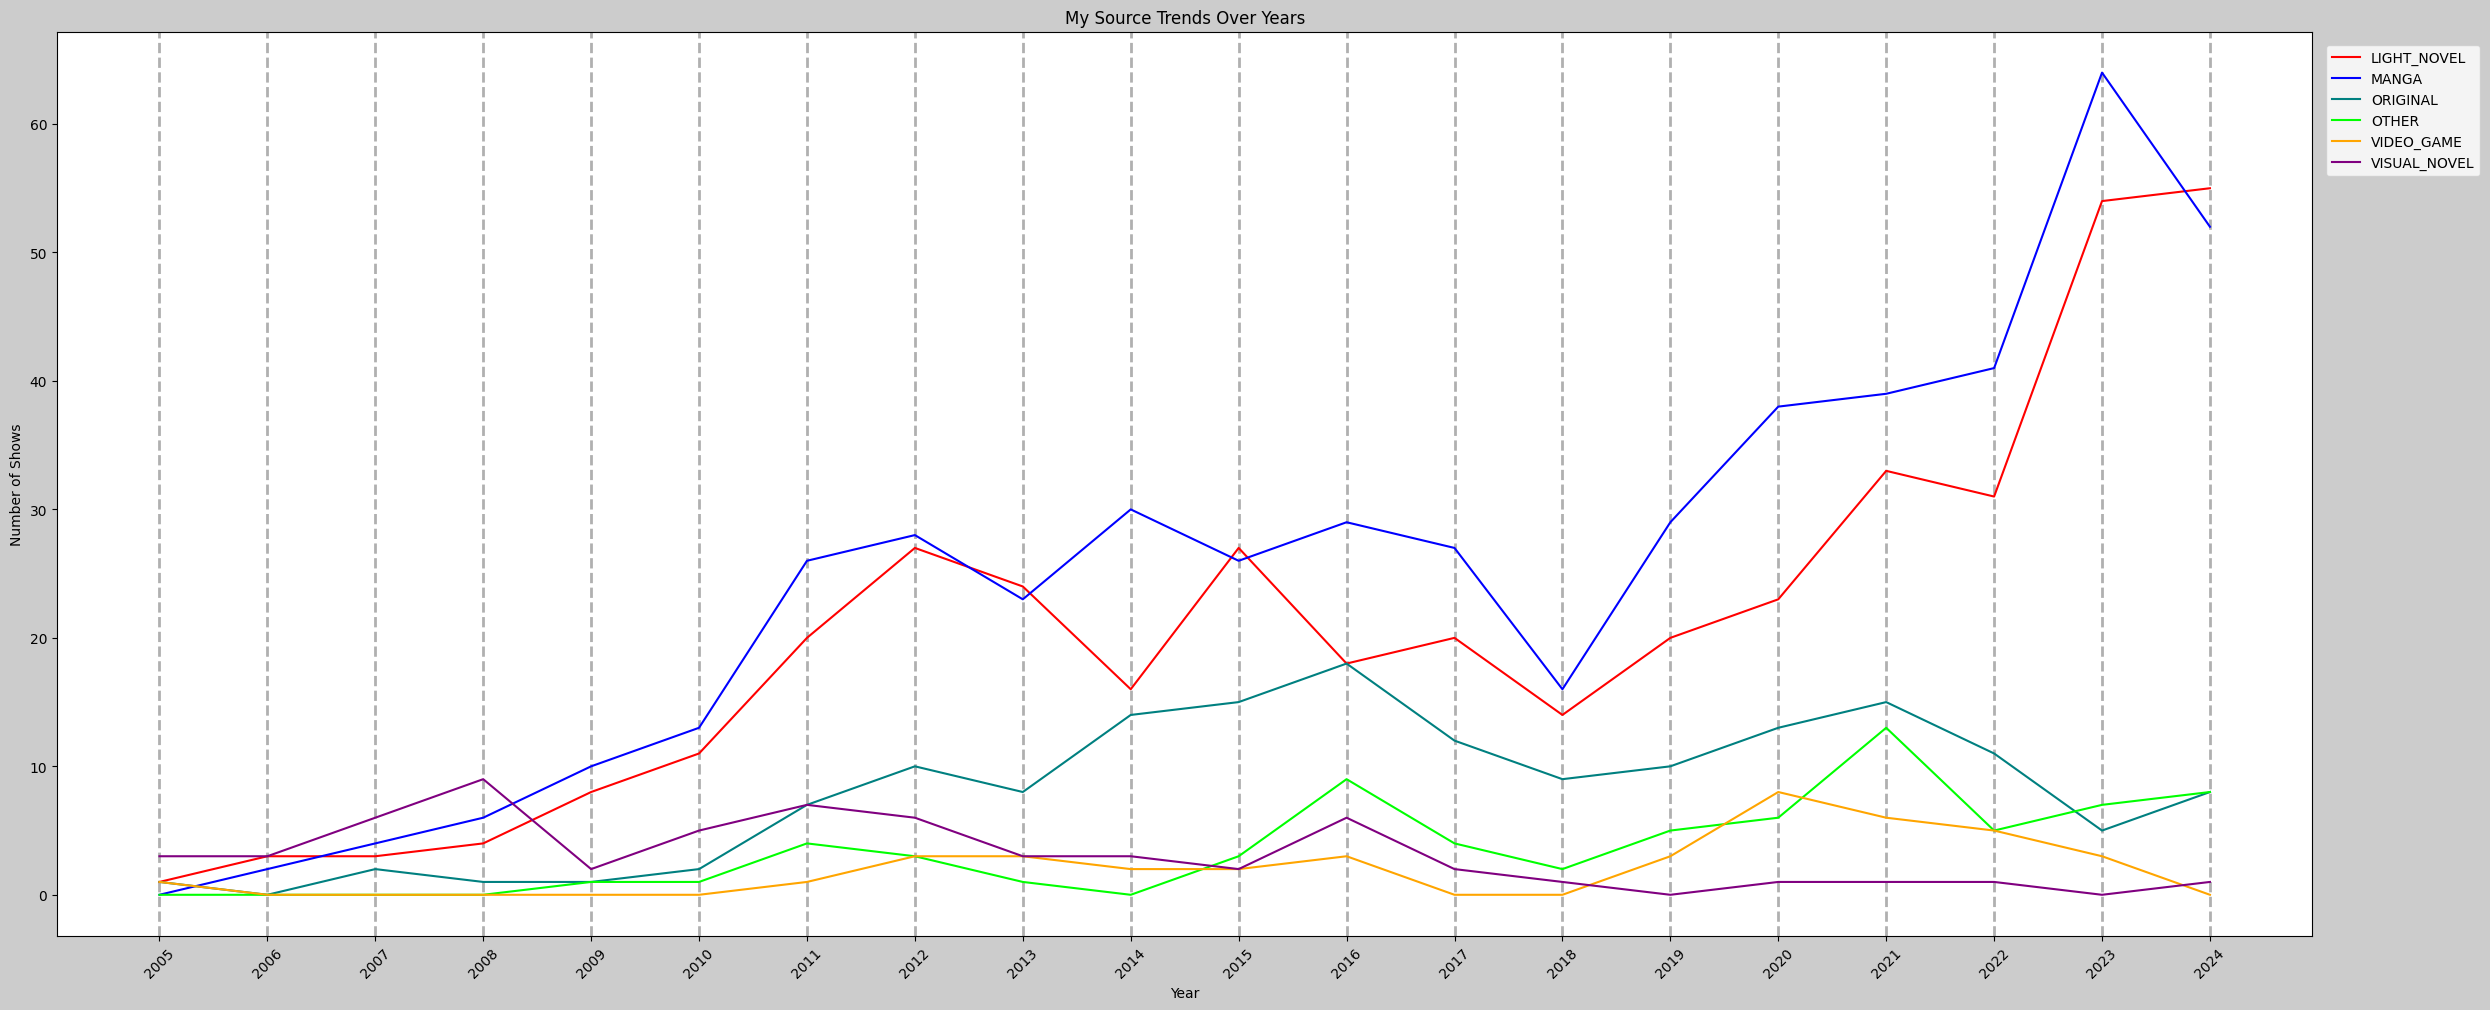

In [19]:
# Pivot the data to have source as columns and years as index
my_source_trends = select_source.pivot_table(values='Title', index='Year', columns='Source', aggfunc='count', fill_value=0)
colors = ['#FF0000','#0000FF','#008080','#00FF00','#FFA500','#800080']#,'#A52A2A']#,'#FFC0CB']#,'#00FFFF','#00FF00','#008080','#FF00FF','#000080']
# Plotting
plt.figure(figsize=(25, 10),facecolor='#cccccc')

# Here we use line plot for each source
for i,tag in enumerate(my_source_trends.columns):
    plt.plot(my_source_trends.index, my_source_trends[tag], label=tag, color=colors[i % len(colors)])

plt.title('My Source Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1.)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=2)

# Adjust layout to prevent clipping of the legend
plt.tight_layout()

plt.xticks(range(min(my_source_trends.index), max(my_source_trends.index) + 1))
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [20]:
df_2 = df_1[(df_1['Year'] > 2004) & (df_1['Year'] <= 2024)]
df_2

Id Format  Year       Source  \
5          15     TV  2005        MANGA   
6          16     TV  2005        MANGA   
16         27     TV  2005  LIGHT_NOVEL   
30         50     TV  2005        MANGA   
45         65     TV  2005        MANGA   
...       ...    ...   ...          ...   
18283  185463    ONA  2023     ORIGINAL   
18287  185541    ONA  2024     ORIGINAL   
18293  185642    ONA  2023     ORIGINAL   
18294  185644     TV  2024        OTHER   
18299  185669    ONA  2024     ORIGINAL   

                                                  Genres  Popularity  \
5                         ['Action', 'Comedy', 'Sports']       29079   
6        ['Comedy', 'Drama', 'Romance', 'Slice of Life']       50455   
16     ['Action', 'Drama', 'Horror', 'Sci-Fi', 'Super...       23424   
30                 ['Comedy', 'Romance', 'Supernatural']       21661   
45                         ['Action', 'Comedy', 'Drama']       14749   
...                                                  ...         ...   
18283                         ['Drama', 'Psychological']         361   
18287                                      ['Adventure']         124   
18293                         ['Horror', 'Supernatural']          90   
18294                   ['Comedy', 'Fantasy', 'Mystery']          22   
18299                         ['Horror', 'Supernatural']          70   

                                                    Tags  \
5      [{'name': 'American Football'}, {'name': 'Shou...   
6      [{'name': 'Coming of Age'}, {'name': 'Josei'},...   
16     [{'name': 'Vampire'}, {'name': 'Male Protagoni...   
30     [{'name': 'Magic'}, {'name': 'Primarily Female...   
45     [{'name': 'Battle Royale'}, {'name': 'Magic'},...   
...                                                  ...   
18283                                                 []   
18287                                                 []   
18293                                                 []   
18294                                                 []   
18299                                                 []   

                                         Title  
5                                 Eyeshield 21  
6                             Honey and Clover  
16                               Trinity Blood  
30                         Oh! My Goddess (TV)  
45                      Rozen Maiden: Dreaming  
...                                        ...  
18283  Artiswitch: Ruru's Episodes of Memories  
18287                Future Folktales Season 2  
18293                Nanashi Kaidan 2nd Season  
18294                          Oshiri Tantei 8  
18299                Nanashi Kaidan 3rd Season  

[4916 rows x 8 columns]

In [21]:
df_2.groupby('Source').Title.count()

Source
LIGHT_NOVEL      672
MANGA           1888
ORIGINAL        1127
OTHER            651
VIDEO_GAME       388
VISUAL_NOVEL     190
Name: Title, dtype: int64

In [22]:
df_year_count = df_2.groupby('Year').Title.count()

In [88]:
df_year_count

Year
2005    162
2006    217
2007    188
2008    195
2009    187
2010    192
2011    210
2012    255
2013    235
2014    286
2015    236
2016    278
2017    290
2018    303
2019    257
2020    253
2021    316
2022    269
2023    333
2024    254
Name: Title, dtype: int64

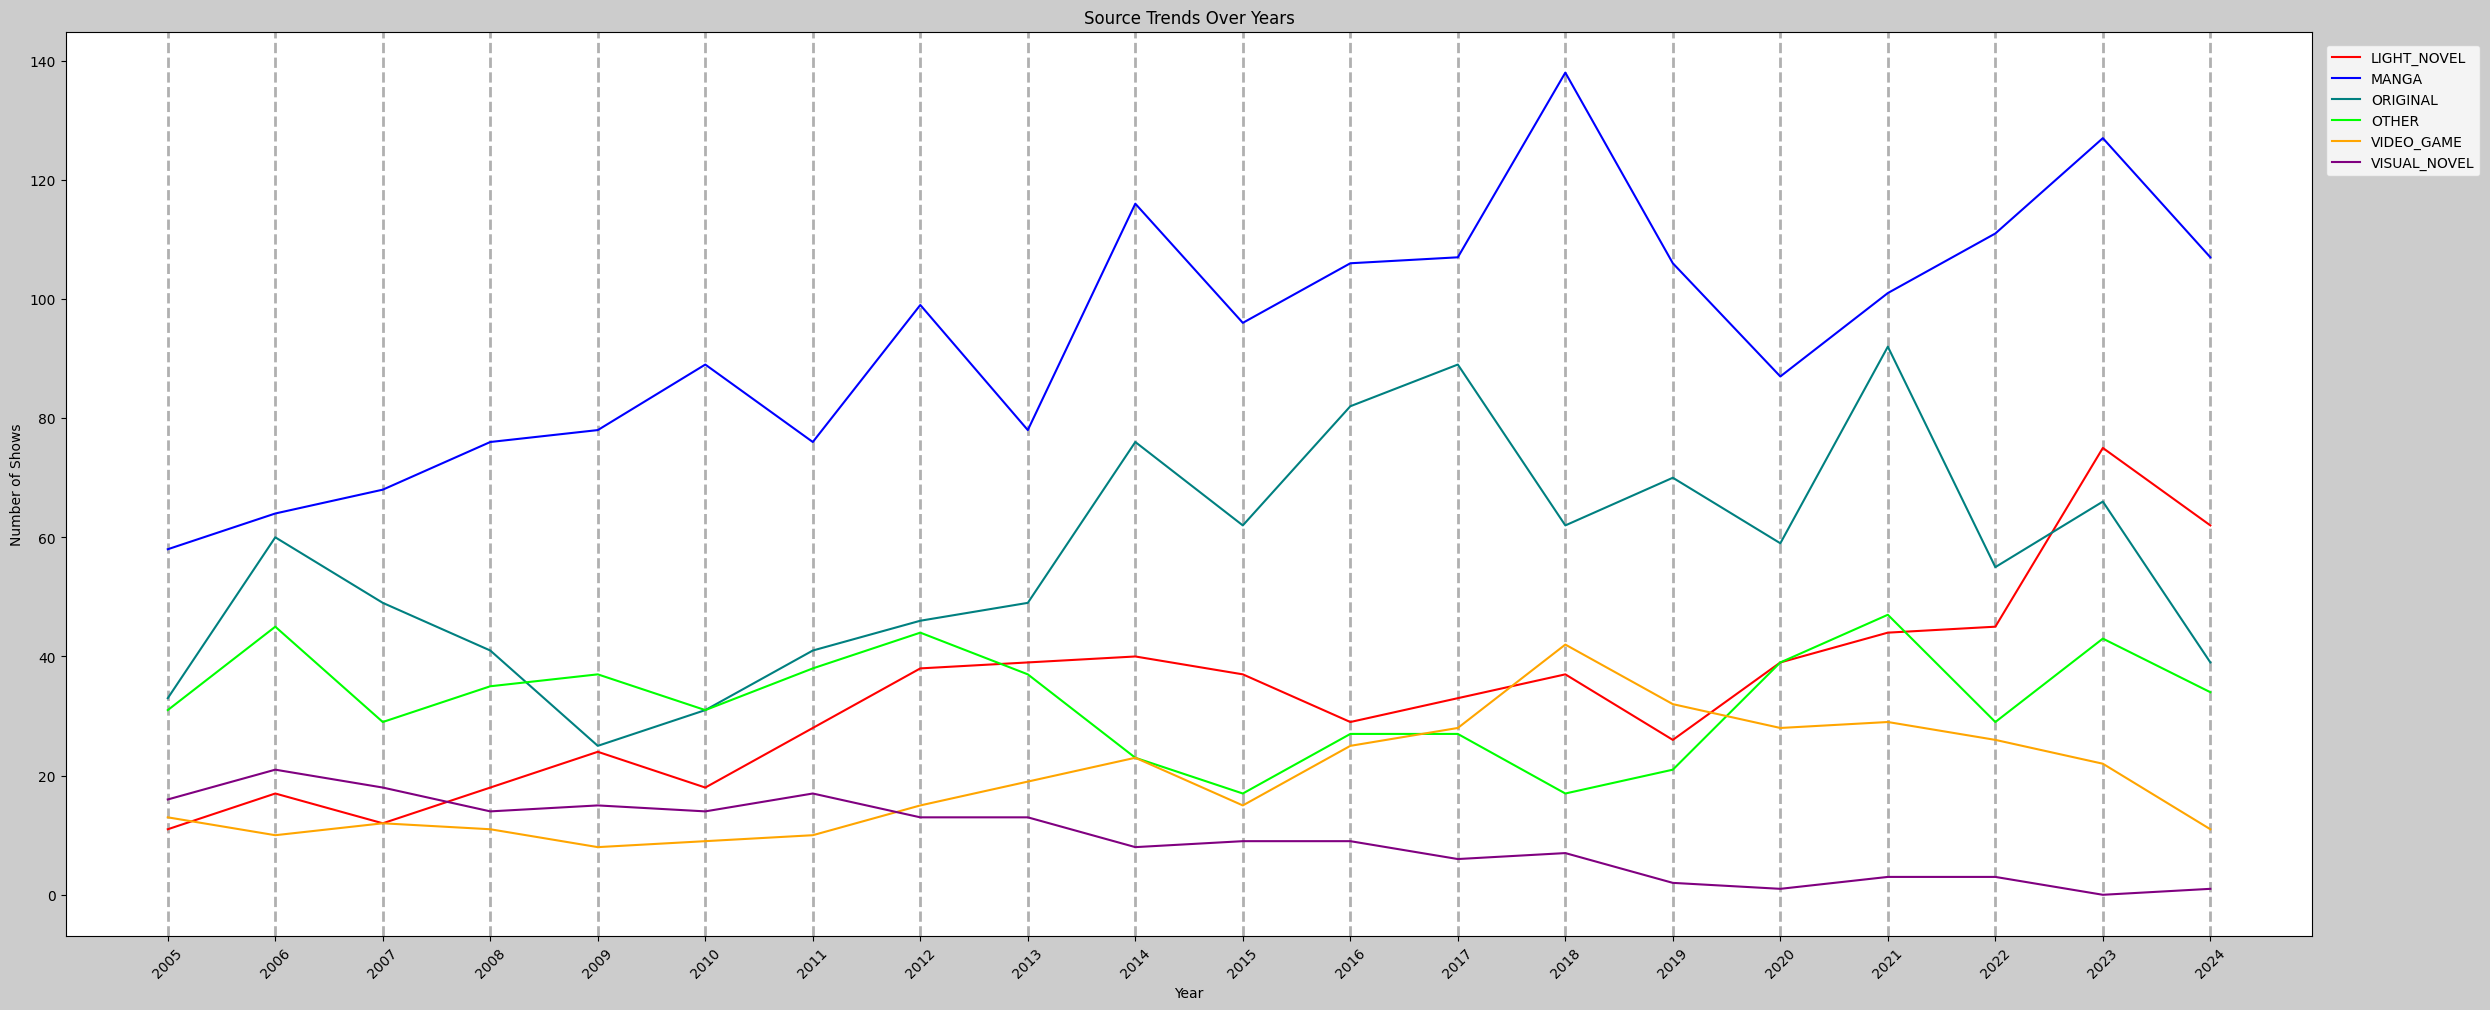

In [23]:
# Pivot the data to have source as columns and years as index
source_trends = df_2.pivot_table(values='Title', index='Year', columns='Source', aggfunc='count', fill_value=0)
colors = ['#FF0000','#0000FF','#008080','#00FF00','#FFA500','#800080']#,'#A52A2A']#,'#FFC0CB']#,'#00FFFF','#00FF00','#008080','#FF00FF','#000080']
# Plotting
plt.figure(figsize=(25, 10),facecolor='#cccccc')

# Here we use line plot for each source
for i,tag in enumerate(source_trends.columns):
    plt.plot(source_trends.index, source_trends[tag], label=tag, color=colors[i % len(colors)])

plt.title('Source Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1.)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=2)

# Adjust layout to prevent clipping of the legend
plt.tight_layout()

plt.xticks(range(min(source_trends.index), max(source_trends.index) + 1))
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [24]:
source_trends.describe()

Source  LIGHT_NOVEL       MANGA   ORIGINAL      OTHER  VIDEO_GAME  \
count     20.000000   20.000000  20.000000  20.000000   20.000000   
mean      33.600000   94.400000  56.350000  32.550000   19.400000   
std       15.965094   21.281076  19.062984   8.952947    9.444575   
min       11.000000   58.000000  25.000000  17.000000    8.000000   
25%       22.500000   77.500000  41.000000  27.000000   11.000000   
50%       35.000000   97.500000  57.000000  32.500000   17.000000   
75%       39.250000  107.000000  67.000000  38.250000   26.500000   
max       75.000000  138.000000  92.000000  47.000000   42.000000   

Source  VISUAL_NOVEL  
count      20.000000  
mean        9.500000  
std         6.468547  
min         0.000000  
25%         3.000000  
50%         9.000000  
75%        14.250000  
max        21.000000

In [25]:
source_trends

Source  LIGHT_NOVEL  MANGA  ORIGINAL  OTHER  VIDEO_GAME  VISUAL_NOVEL
Year                                                                 
2005             11     58        33     31          13            16
2006             17     64        60     45          10            21
2007             12     68        49     29          12            18
2008             18     76        41     35          11            14
2009             24     78        25     37           8            15
2010             18     89        31     31           9            14
2011             28     76        41     38          10            17
2012             38     99        46     44          15            13
2013             39     78        49     37          19            13
2014             40    116        76     23          23             8
2015             37     96        62     17          15             9
2016             29    106        82     27          25             9
2017             33    107        89     27          28             6
2018             37    138        62     17          42             7
2019             26    106        70     21          32             2
2020             39     87        59     39          28             1
2021             44    101        92     47          29             3
2022             45    111        55     29          26             3
2023             75    127        66     43          22             0
2024             62    107        39     34          11             1

In [26]:
df_year_count

Year
2005    162
2006    217
2007    188
2008    195
2009    187
2010    192
2011    210
2012    255
2013    235
2014    286
2015    236
2016    278
2017    290
2018    303
2019    257
2020    253
2021    316
2022    269
2023    333
2024    254
Name: Title, dtype: int64

In [27]:
source_year_count_merge = pd.merge(df_year_count, source_trends, on='Year',how='outer')

In [28]:
source_year_count_merge

Title  LIGHT_NOVEL  MANGA  ORIGINAL  OTHER  VIDEO_GAME  VISUAL_NOVEL
Year                                                                      
2005    162           11     58        33     31          13            16
2006    217           17     64        60     45          10            21
2007    188           12     68        49     29          12            18
2008    195           18     76        41     35          11            14
2009    187           24     78        25     37           8            15
2010    192           18     89        31     31           9            14
2011    210           28     76        41     38          10            17
2012    255           38     99        46     44          15            13
2013    235           39     78        49     37          19            13
2014    286           40    116        76     23          23             8
2015    236           37     96        62     17          15             9
2016    278           29    106        82     27          25             9
2017    290           33    107        89     27          28             6
2018    303           37    138        62     17          42             7
2019    257           26    106        70     21          32             2
2020    253           39     87        59     39          28             1
2021    316           44    101        92     47          29             3
2022    269           45    111        55     29          26             3
2023    333           75    127        66     43          22             0
2024    254           62    107        39     34          11             1

In [29]:
source_year_count_merge[['Title','LIGHT_NOVEL','MANGA','ORIGINAL','OTHER','VIDEO_GAME','VISUAL_NOVEL']] = source_year_count_merge[['Title','LIGHT_NOVEL','MANGA','ORIGINAL','OTHER','VIDEO_GAME','VISUAL_NOVEL']].apply(lambda x: (x/x[0])*100, axis=1)
source_year_count_merge

C:\Users\Leolion023\AppData\Local\Temp\ipykernel_132684\2465074007.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  source_year_count_merge[['Title','LIGHT_NOVEL','MANGA','ORIGINAL','OTHER','VIDEO_GAME','VISUAL_NOVEL']] = source_year_count_merge[['Title','LIGHT_NOVEL','MANGA','ORIGINAL','OTHER','VIDEO_GAME','VISUAL_NOVEL']].apply(lambda x: (x/x[0])*100, axis=1)


Title  LIGHT_NOVEL      MANGA   ORIGINAL      OTHER  VIDEO_GAME  \
Year                                                                    
2005  100.0     6.790123  35.802469  20.370370  19.135802    8.024691   
2006  100.0     7.834101  29.493088  27.649770  20.737327    4.608295   
2007  100.0     6.382979  36.170213  26.063830  15.425532    6.382979   
2008  100.0     9.230769  38.974359  21.025641  17.948718    5.641026   
2009  100.0    12.834225  41.711230  13.368984  19.786096    4.278075   
2010  100.0     9.375000  46.354167  16.145833  16.145833    4.687500   
2011  100.0    13.333333  36.190476  19.523810  18.095238    4.761905   
2012  100.0    14.901961  38.823529  18.039216  17.254902    5.882353   
2013  100.0    16.595745  33.191489  20.851064  15.744681    8.085106   
2014  100.0    13.986014  40.559441  26.573427   8.041958    8.041958   
2015  100.0    15.677966  40.677966  26.271186   7.203390    6.355932   
2016  100.0    10.431655  38.129496  29.496403   9.712230    8.992806   
2017  100.0    11.379310  36.896552  30.689655   9.310345    9.655172   
2018  100.0    12.211221  45.544554  20.462046   5.610561   13.861386   
2019  100.0    10.116732  41.245136  27.237354   8.171206   12.451362   
2020  100.0    15.415020  34.387352  23.320158  15.415020   11.067194   
2021  100.0    13.924051  31.962025  29.113924  14.873418    9.177215   
2022  100.0    16.728625  41.263941  20.446097  10.780669    9.665428   
2023  100.0    22.522523  38.138138  19.819820  12.912913    6.606607   
2024  100.0    24.409449  42.125984  15.354331  13.385827    4.330709   

      VISUAL_NOVEL  
Year                
2005      9.876543  
2006      9.677419  
2007      9.574468  
2008      7.179487  
2009      8.021390  
2010      7.291667  
2011      8.095238  
2012      5.098039  
2013      5.531915  
2014      2.797203  
2015      3.813559  
2016      3.237410  
2017      2.068966  
2018      2.310231  
2019      0.778210  
2020      0.395257  
2021      0.949367  
2022      1.115242  
2023      0.000000  
2024      0.393701

In [30]:
source_year_count_merge = source_year_count_merge.drop('Title', axis=1)

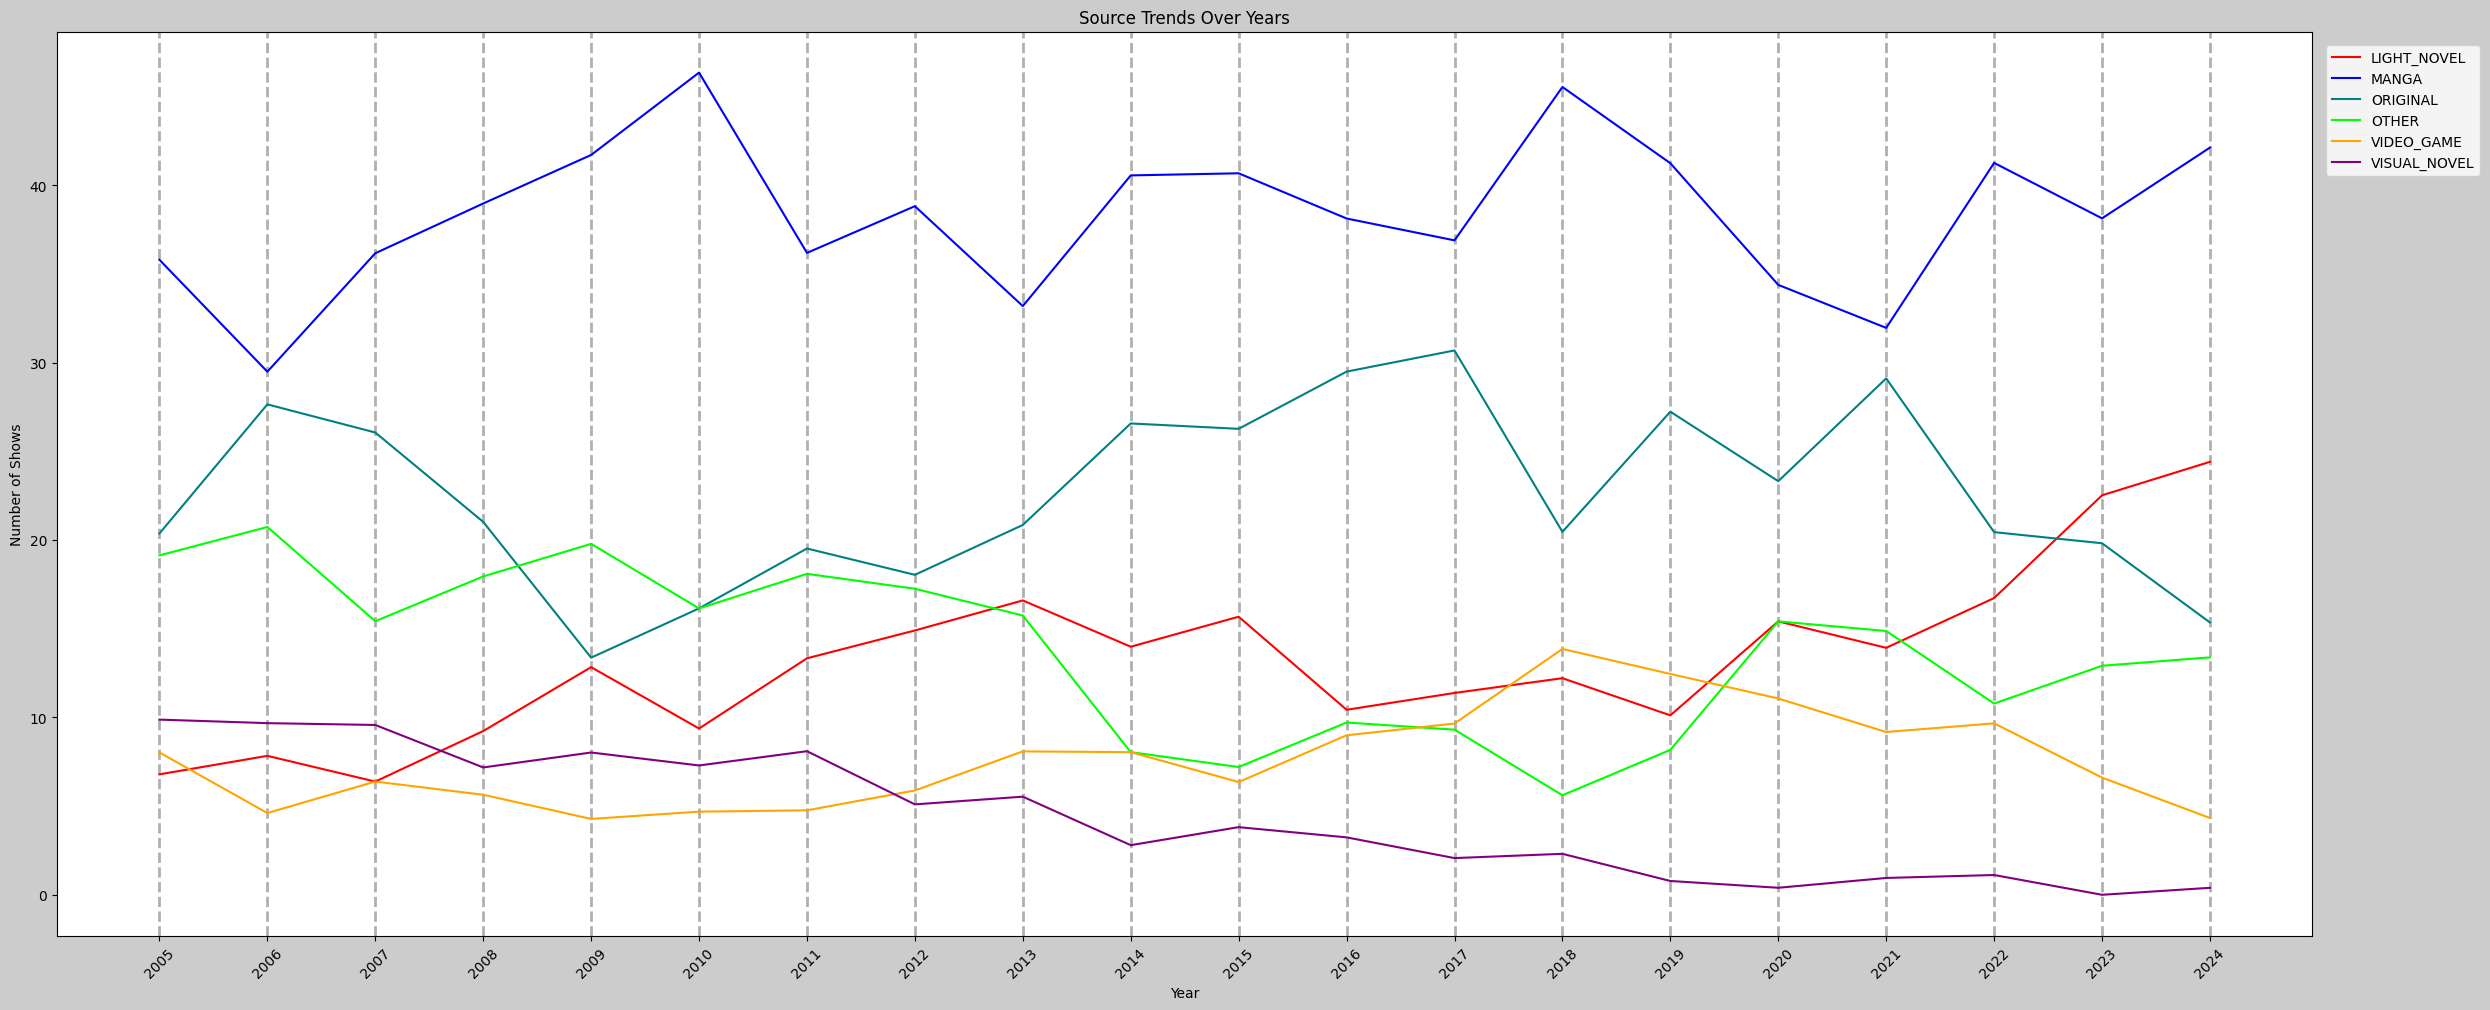

In [31]:
# Pivot the data to have source as columns and years as index
#source_trends = df_2.pivot_table(values='Title', index='Year', columns='Source', aggfunc='count', fill_value=0)
colors = ['#FF0000','#0000FF','#008080','#00FF00','#FFA500','#800080']#,'#A52A2A']#,'#FFC0CB']#,'#00FFFF','#00FF00','#008080','#FF00FF','#000080']
# Plotting
plt.figure(figsize=(25, 10),facecolor='#cccccc')

# Here we use line plot for each source
for i,tag in enumerate(source_year_count_merge.columns):
    plt.plot(source_year_count_merge.index, source_year_count_merge[tag], label=tag, color=colors[i % len(colors)])

plt.title('Source Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1.)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=2)

# Adjust layout to prevent clipping of the legend
plt.tight_layout()

plt.xticks(range(min(source_year_count_merge.index), max(source_year_count_merge.index) + 1))
plt.xticks(rotation=45)

# Show the plot
plt.show()

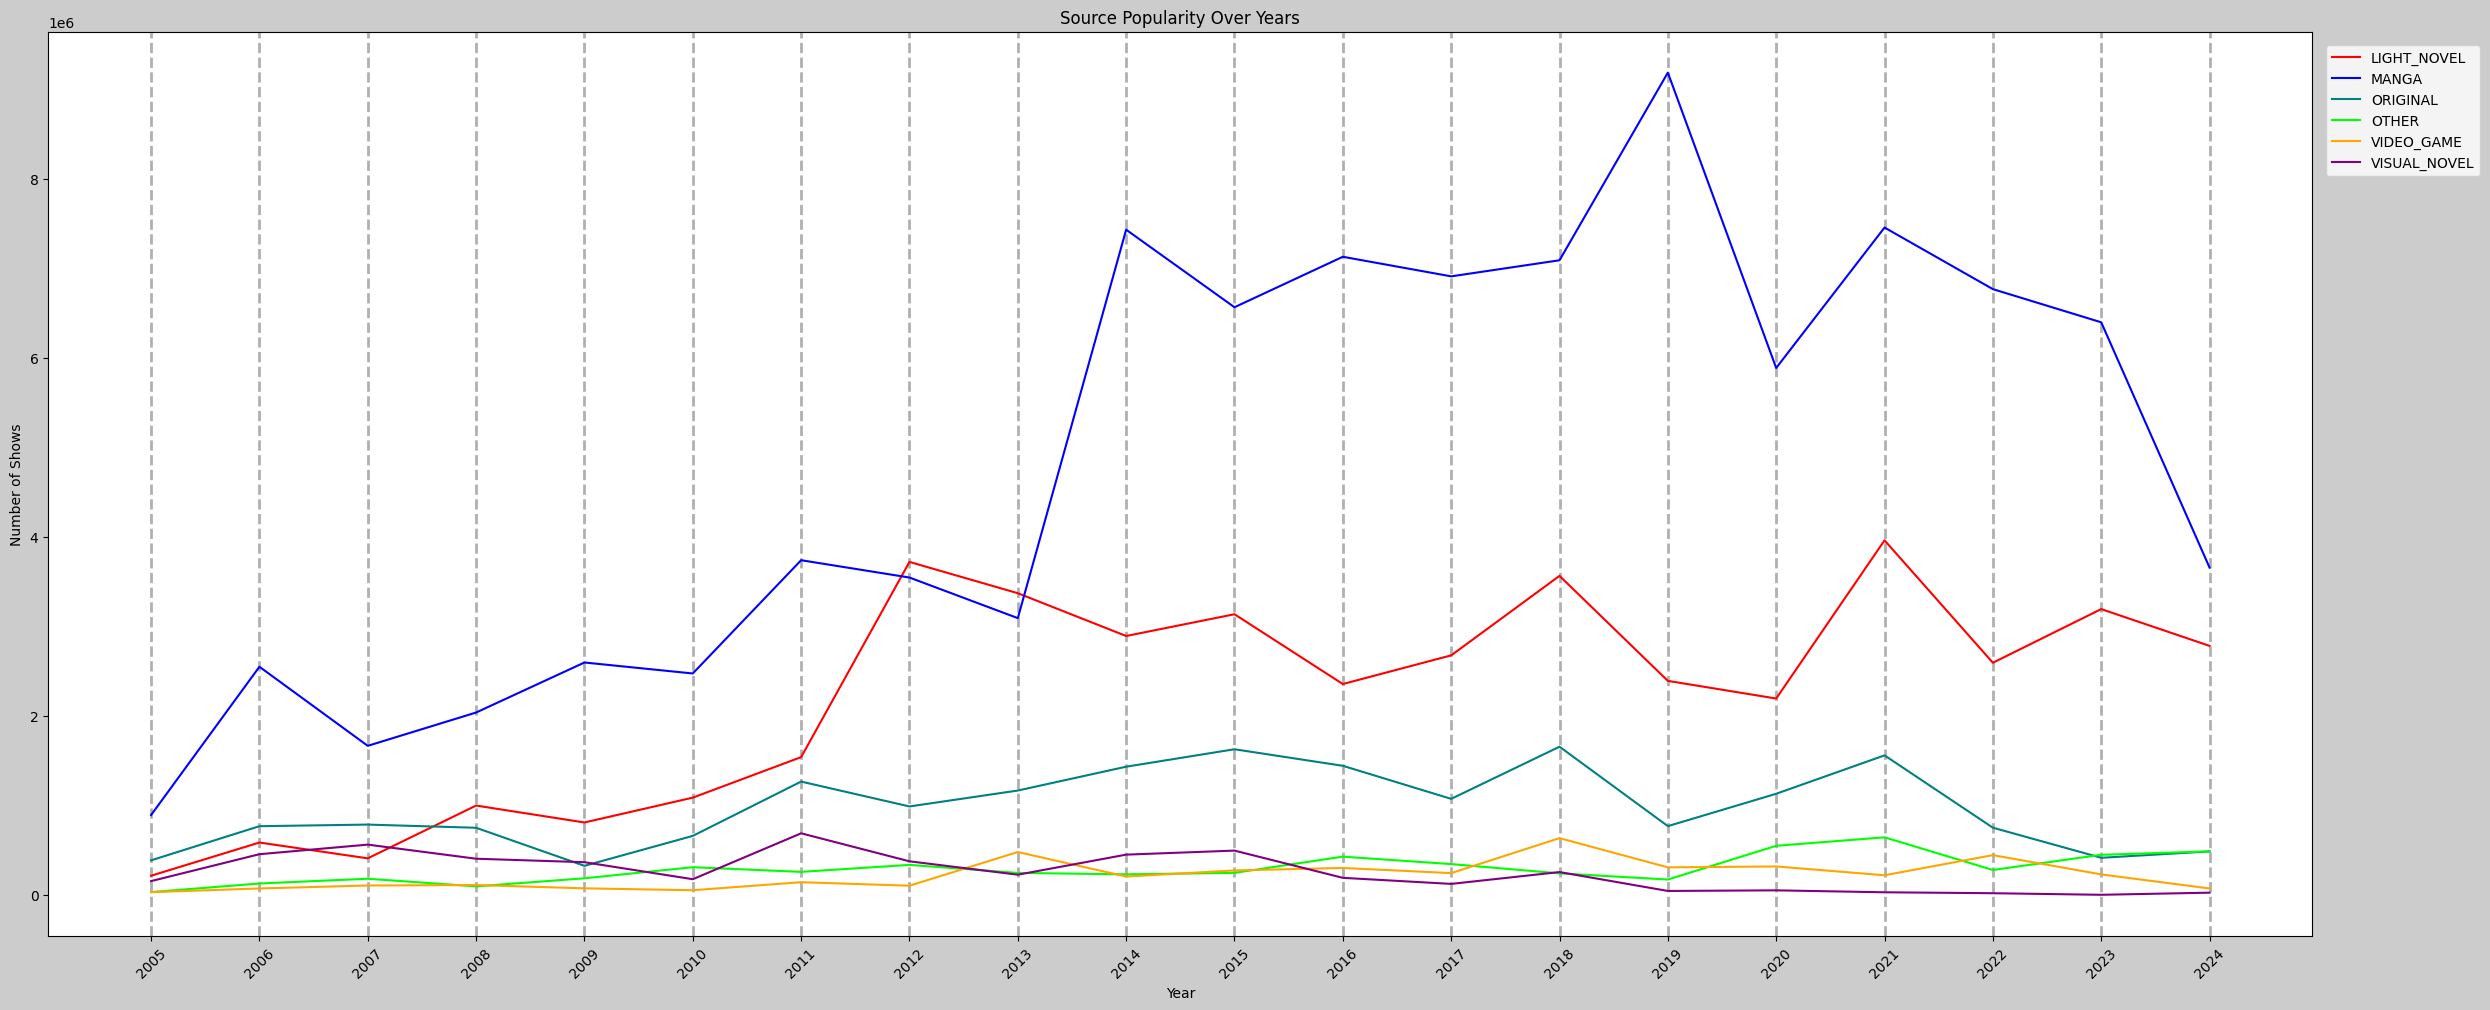

In [32]:
# Pivot the data to have source as columns and years as index
source_popularity = df_2.pivot_table(values='Popularity', index='Year', columns='Source', aggfunc='sum', fill_value=0)
colors = ['#FF0000','#0000FF','#008080','#00FF00','#FFA500','#800080']#,'#A52A2A']#,'#FFC0CB']#,'#00FFFF','#00FF00','#008080','#FF00FF','#000080']
# Plotting
plt.figure(figsize=(25, 10),facecolor='#cccccc')

# Here we use line plot for each source
for i,tag in enumerate(source_popularity.columns):
    plt.plot(source_popularity.index, source_popularity[tag], label=tag, color=colors[i % len(colors)])

plt.title('Source Popularity Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1.)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=2)

# Adjust layout to prevent clipping of the legend
plt.tight_layout()

plt.xticks(range(min(source_popularity.index), max(source_popularity.index) + 1))
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [33]:
source_popularity.describe()

Source   LIGHT_NOVEL         MANGA      ORIGINAL          OTHER  \
count   2.000000e+01  2.000000e+01  2.000000e+01      20.000000   
mean    2.222286e+06  4.852139e+06  9.703298e+05  290312.700000   
std     1.182586e+06  2.449427e+06  4.265388e+05  155404.173134   
min     2.129740e+05  8.908260e+05  3.234490e+05   29647.000000   
25%     1.063273e+06  2.583231e+06  7.259892e+05  183044.750000   
50%     2.491154e+06  4.811693e+06  8.855980e+05  250546.500000   
75%     3.148727e+06  6.954072e+06  1.306302e+06  363862.750000   
max     3.960014e+06  9.185300e+06  1.654342e+06  642061.000000   

Source     VIDEO_GAME   VISUAL_NOVEL  
count       20.000000      20.000000  
mean    219472.350000  253096.450000  
std     160751.485379  207103.277438  
min      29417.000000       0.000000  
25%      94135.500000   47961.750000  
50%     211003.500000  206905.000000  
75%     301515.750000  414300.000000  
max     633024.000000  686774.000000

In [34]:
select_genre = pd.read_sql_query(
    '''
    SELECT a.Id, a.Title, a.Year, a.Genres
    FROM anilist AS a
    RIGHT JOIN myanilist AS m
    ON a.id = m.mediaId
    WHERE Year > 2004 AND Year <= 2024;
    ''',
    con
)

In [35]:
select_genre

Id                                              Title  Year  \
0         79                                           SHUFFLE!  2005   
1        101                                                Air  2005   
2        184                            Xenosaga: The Animation  2005   
3        291                   D.C.S.S. ~Da Capo Second Season~  2005   
4        355                                  Shakugan no Shana  2005   
...      ...                                                ...   ...   
1246  176311               Blue Exorcist -Beyond the Snow Saga-  2024   
1247  176660          Sengoku Youko: The Thousandfold Chaos Arc  2024   
1248  177104  The Most Notorious "Talker" Runs the World's G...  2024   
1249  178434  As a Reincarnated Aristocrat, I'll Use My Appr...  2024   
1250  178533                                    Ranma1/2 (2024)  2024   

                                                 Genres  
0     ['Comedy', 'Drama', 'Ecchi', 'Fantasy', 'Roman...  
1     ['Drama', 'Romance', 'Slice of Life', 'Superna...  
2                         ['Action', 'Mecha', 'Sci-Fi']  
3        ['Comedy', 'Drama', 'Romance', 'Supernatural']  
4     ['Action', 'Comedy', 'Drama', 'Fantasy', 'Roma...  
...                                                 ...  
1246              ['Action', 'Fantasy', 'Supernatural']  
1247                 ['Action', 'Adventure', 'Fantasy']  
1248  ['Action', 'Adventure', 'Comedy', 'Fantasy', '...  
1249                           ['Adventure', 'Fantasy']  
1250                    ['Action', 'Comedy', 'Romance']  

[1251 rows x 4 columns]

In [36]:
select_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      1251 non-null   int64 
 1   Title   1251 non-null   object
 2   Year    1251 non-null   int64 
 3   Genres  1251 non-null   object
dtypes: int64(2), object(2)
memory usage: 39.2+ KB


In [37]:
select_genre['Genres'] = select_genre['Genres'].apply(literal_eval)

In [38]:
select_genre_2 = select_genre.explode('Genres')
select_genre_2

Id                                              Title  Year  \
0         79                                           SHUFFLE!  2005   
0         79                                           SHUFFLE!  2005   
0         79                                           SHUFFLE!  2005   
0         79                                           SHUFFLE!  2005   
0         79                                           SHUFFLE!  2005   
...      ...                                                ...   ...   
1249  178434  As a Reincarnated Aristocrat, I'll Use My Appr...  2024   
1249  178434  As a Reincarnated Aristocrat, I'll Use My Appr...  2024   
1250  178533                                    Ranma1/2 (2024)  2024   
1250  178533                                    Ranma1/2 (2024)  2024   
1250  178533                                    Ranma1/2 (2024)  2024   

         Genres  
0        Comedy  
0         Drama  
0         Ecchi  
0       Fantasy  
0       Romance  
...         ...  
1249  Adventure  
1249    Fantasy  
1250     Action  
1250     Comedy  
1250    Romance  

[4175 rows x 4 columns]

In [39]:
select_genre_2.groupby('Genres').Title.count()

Genres
Action           523
Adventure        271
Comedy           589
Drama            370
Ecchi            180
Fantasy          473
Horror            36
Mahou Shoujo      38
Mecha             53
Music             37
Mystery          148
Psychological    114
Romance          443
Sci-Fi           186
Slice of Life    362
Sports            38
Supernatural     262
Thriller          52
Name: Title, dtype: int64

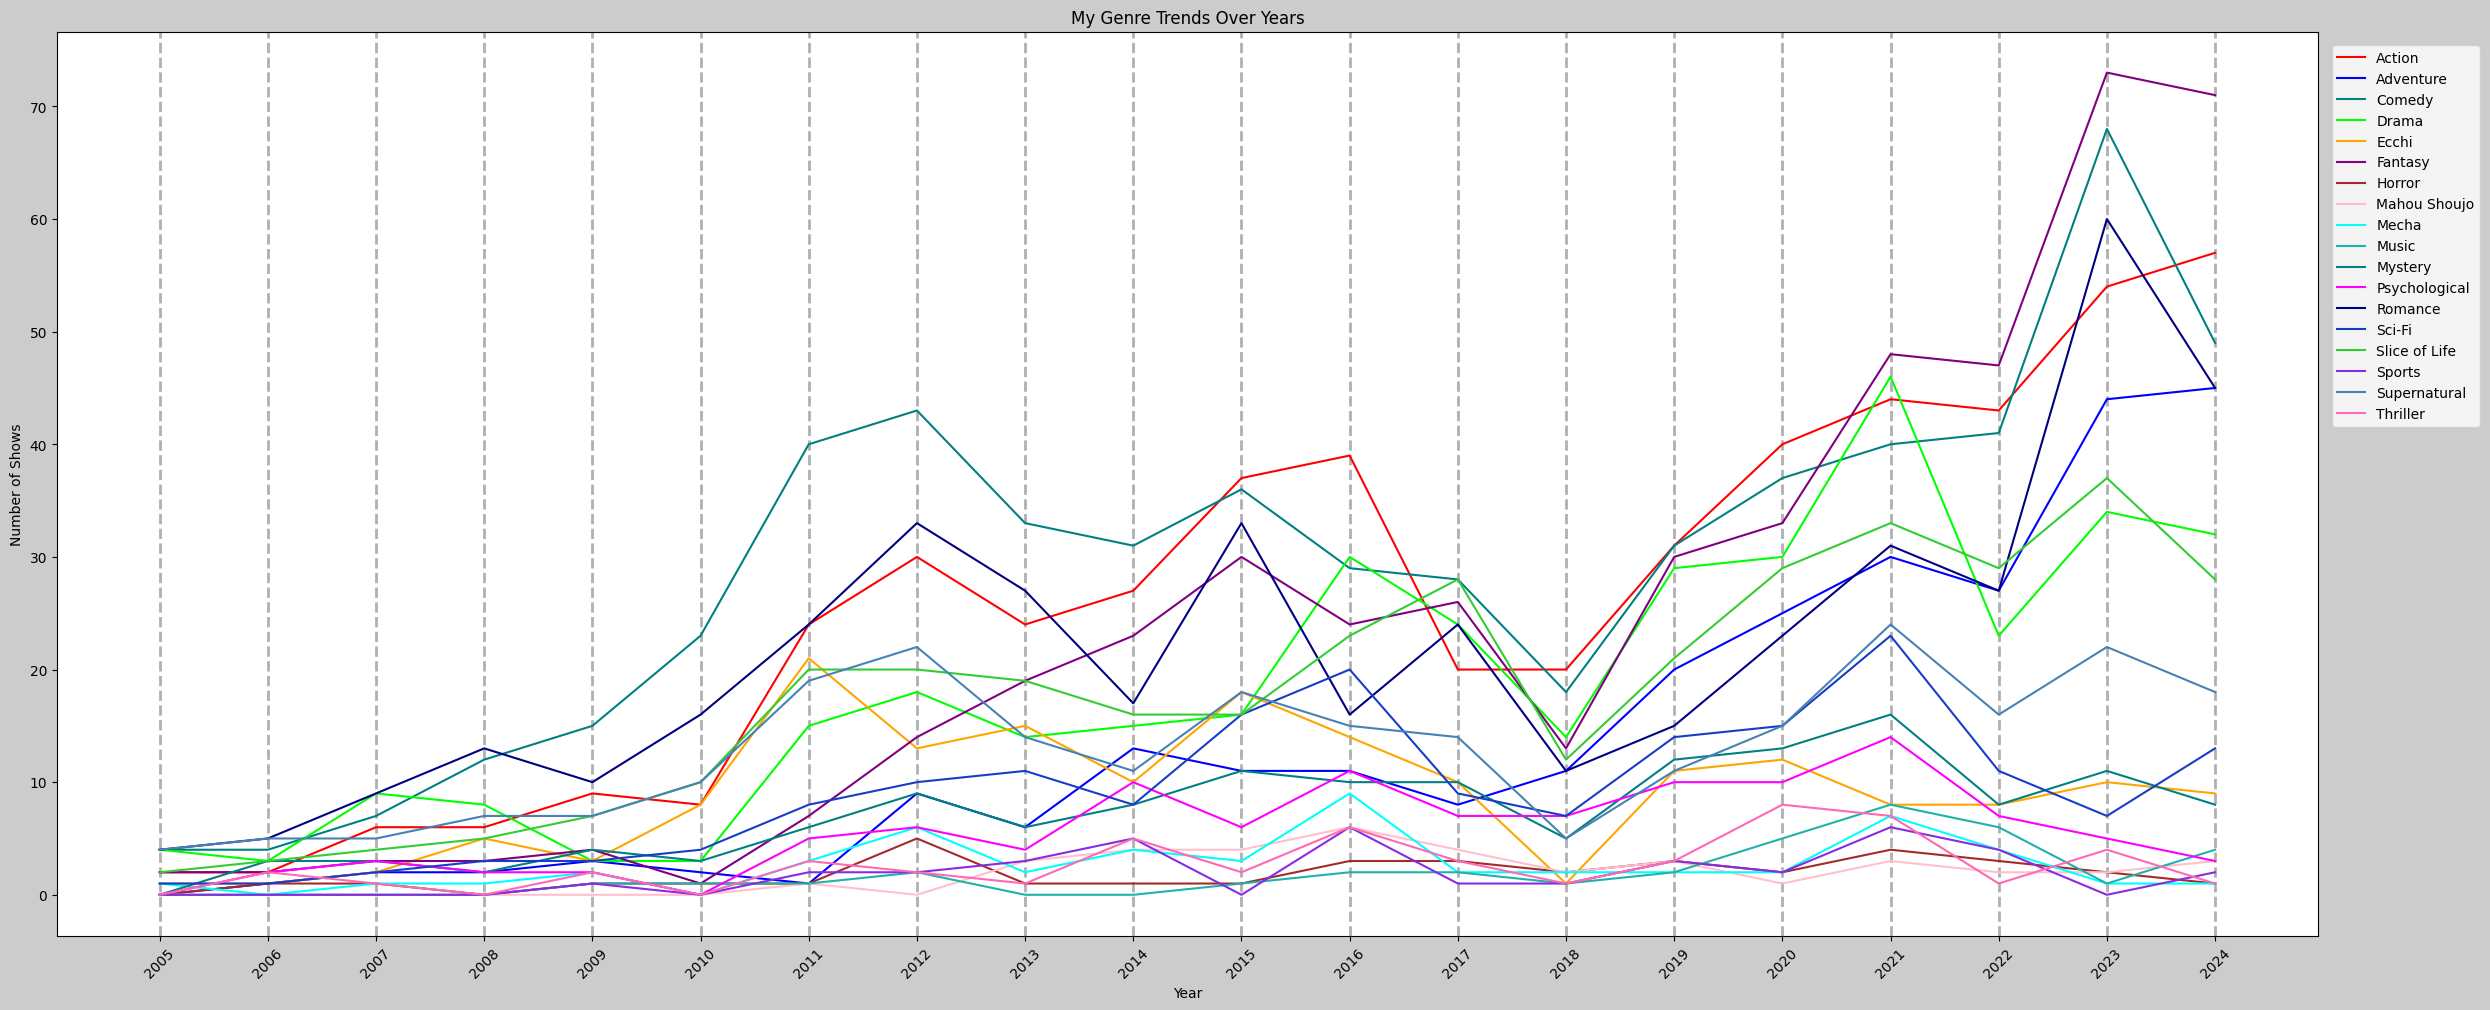

In [40]:
# Pivot the data to have genres as columns and years as index
my_genre_trends = select_genre_2.pivot_table(values='Title', index='Year', columns='Genres', aggfunc='count', fill_value=0)
colors = [
    '#FF0000',
    '#0000FF',
    '#008080',
    '#00FF00',
    '#FFA500',
    '#800080',
    '#A52A2A',
    '#FFC0CB',
    '#00FFFF',
    '#20B2AA',
    '#008080',
    '#FF00FF',
    '#000080',
    '#173DC8',
    '#32CD32',
    '#8A2BE2',
    '#4682B4',
    '#FF69B4'
    ]
# Plotting
plt.figure(figsize=(25, 10),facecolor='#cccccc')

# Here we use line plot for each genre
for i,tag in enumerate(my_genre_trends.columns):
    plt.plot(my_genre_trends.index, my_genre_trends[tag], label=tag, color=colors[i % len(colors)])

plt.title('My Genre Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1.)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=2)

# Adjust layout to prevent clipping of the legend
plt.tight_layout()

plt.xticks(range(min(my_genre_trends.index), max(my_genre_trends.index) + 1))
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [41]:
df_genres = df_2

In [42]:
df_genres['Genres'] = df_genres['Genres'].apply(literal_eval)

C:\Users\Leolion023\AppData\Local\Temp\ipykernel_132684\3920499981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genres['Genres'] = df_genres['Genres'].apply(literal_eval)


In [43]:
df_genres = df_genres.explode('Genres')

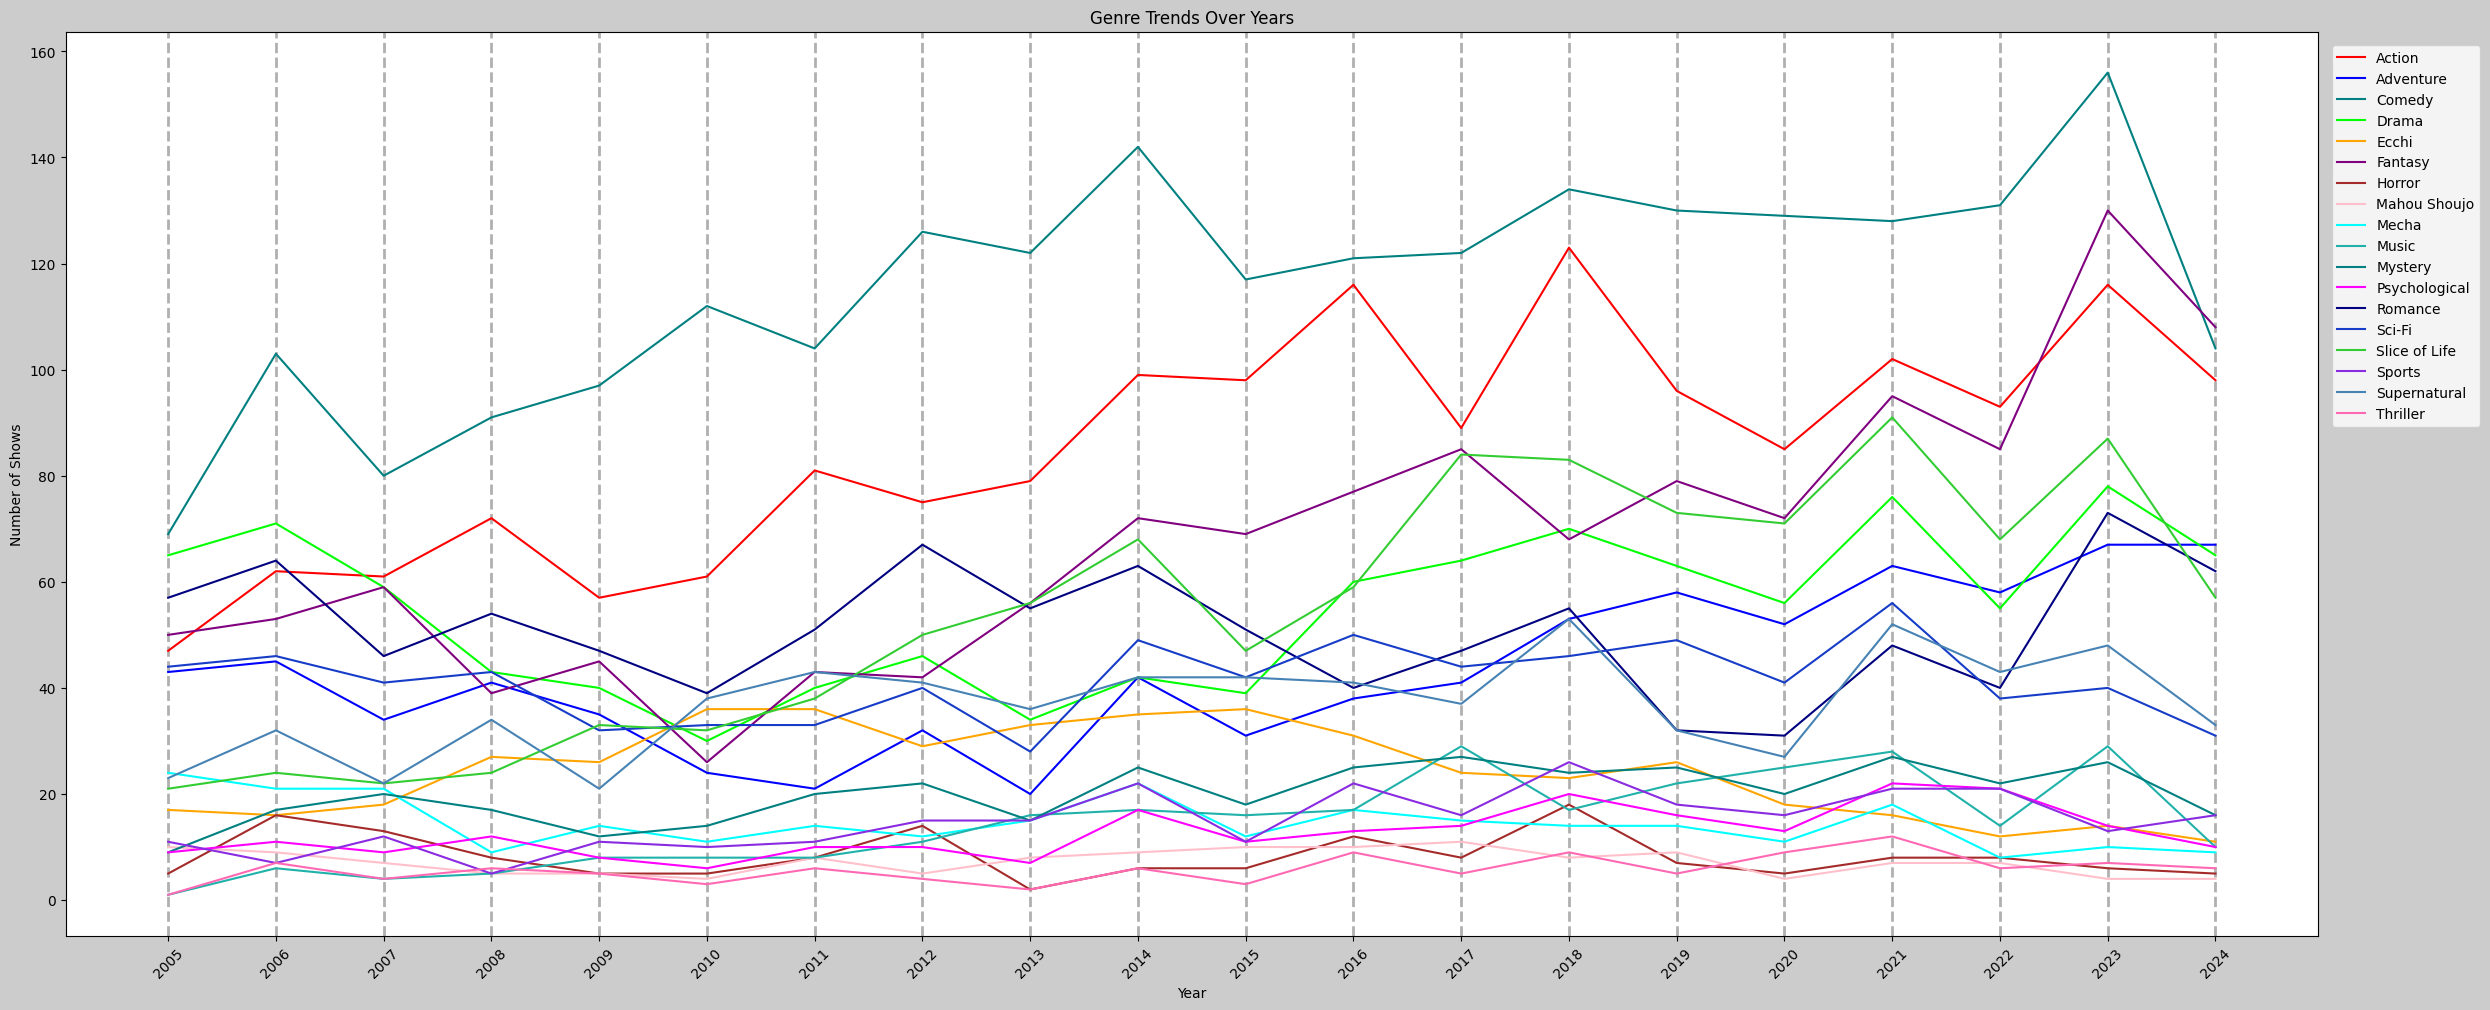

In [44]:
# Pivot the data to have genres as columns and years as index
genre_trends = df_genres.pivot_table(values='Title', index='Year', columns='Genres', aggfunc='count', fill_value=0)
colors = [
    '#FF0000',
    '#0000FF',
    '#008080',
    '#00FF00',
    '#FFA500',
    '#800080',
    '#A52A2A',
    '#FFC0CB',
    '#00FFFF',
    '#20B2AA',
    '#008080',
    '#FF00FF',
    '#000080',
    '#173DC8',
    '#32CD32',
    '#8A2BE2',
    '#4682B4',
    '#FF69B4'
    ]
# Plotting
plt.figure(figsize=(25, 10),facecolor='#cccccc')

# Here we use line plot for each genre
for i,tag in enumerate(genre_trends.columns):
    plt.plot(genre_trends.index, genre_trends[tag], label=tag, color=colors[i % len(colors)])

plt.title('Genre Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1.)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=2)

# Adjust layout to prevent clipping of the legend
plt.tight_layout()

plt.xticks(range(min(genre_trends.index), max(genre_trends.index) + 1))
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [45]:
genre_trends.describe()

Genres      Action  Adventure      Comedy      Drama     Ecchi     Fantasy  \
count    20.000000  20.000000   20.000000  20.000000  20.00000   20.000000   
mean     85.500000  43.250000  115.900000  54.800000  24.20000   67.650000   
std      21.293686  14.516325   21.145859  14.515328   8.54462   25.332058   
min      47.000000  20.000000   69.000000  30.000000  11.00000   26.000000   
25%      69.500000  33.500000  103.750000  41.500000  16.75000   48.750000   
50%      87.000000  41.500000  121.500000  57.500000  25.00000   68.500000   
75%      98.250000  54.250000  129.250000  65.000000  31.50000   80.500000   
max     123.000000  67.000000  156.000000  78.000000  36.00000  130.000000   

Genres     Horror  Mahou Shoujo      Mecha      Music    Mystery  \
count   20.000000      20.00000  20.000000  20.000000  20.000000   
mean     8.250000       7.20000  14.550000  14.550000  20.050000   
std      4.191156       2.35305   4.650693   8.605231   5.216119   
min      2.000000       4.00000   8.000000   1.000000   9.000000   
25%      5.000000       5.00000  11.000000   8.000000  16.750000   
50%      7.500000       7.50000  14.000000  15.000000  20.000000   
75%      9.000000       9.00000  17.250000  18.250000  25.000000   
max     18.000000      11.00000  24.000000  29.000000  27.000000   

Genres  Psychological    Romance     Sci-Fi  Slice of Life     Sports  \
count       20.000000  20.000000  20.000000      20.000000  20.000000   
mean        12.650000  51.100000  41.300000      54.400000  14.950000   
std          4.568485  11.387435   7.233693      23.435017   5.472178   
min          6.000000  31.000000  28.000000      21.000000   5.000000   
25%          9.750000  44.500000  36.750000      32.750000  11.000000   
50%         11.500000  51.000000  41.500000      56.500000  15.000000   
75%         14.500000  58.250000  46.000000      71.500000  18.750000   
max         22.000000  73.000000  56.000000      91.000000  26.000000   

Genres  Supernatural   Thriller  
count      20.000000  20.000000  
mean       37.000000   5.750000  
std         9.205262   2.653201  
min        21.000000   1.000000  
25%        32.000000   4.000000  
50%        37.500000   6.000000  
75%        42.250000   7.000000  
max        53.000000  12.000000

In [46]:
genre_year_count_merge = pd.merge(df_year_count, genre_trends, on='Year',how='outer')
genre_year_count_merge

Title  Action  Adventure  Comedy  Drama  Ecchi  Fantasy  Horror  \
Year                                                                    
2005    162      47         43      69     65     17       50       5   
2006    217      62         45     103     71     16       53      16   
2007    188      61         34      80     59     18       59      13   
2008    195      72         41      91     43     27       39       8   
2009    187      57         35      97     40     26       45       5   
2010    192      61         24     112     30     36       26       5   
2011    210      81         21     104     40     36       43       8   
2012    255      75         32     126     46     29       42      14   
2013    235      79         20     122     34     33       56       2   
2014    286      99         42     142     42     35       72       6   
2015    236      98         31     117     39     36       69       6   
2016    278     116         38     121     60     31       77      12   
2017    290      89         41     122     64     24       85       8   
2018    303     123         53     134     70     23       68      18   
2019    257      96         58     130     63     26       79       7   
2020    253      85         52     129     56     18       72       5   
2021    316     102         63     128     76     16       95       8   
2022    269      93         58     131     55     12       85       8   
2023    333     116         67     156     78     14      130       6   
2024    254      98         67     104     65     11      108       5   

      Mahou Shoujo  Mecha  Music  Mystery  Psychological  Romance  Sci-Fi  \
Year                                                                        
2005            10     24      1        9              9       57      44   
2006             9     21      6       17             11       64      46   
2007             7     21      4       20              9       46      41   
2008             5      9      5       17             12       54      43   
2009             5     14      8       12              8       47      32   
2010             4     11      8       14              6       39      33   
2011             8     14      8       20             10       51      33   
2012             5     12     11       22             10       67      40   
2013             8     15     16       15              7       55      28   
2014             9     22     17       25             17       63      49   
2015            10     12     16       18             11       51      42   
2016            10     17     17       25             13       40      50   
2017            11     15     29       27             14       47      44   
2018             8     14     17       24             20       55      46   
2019             9     14     22       25             16       32      49   
2020             4     11     25       20             13       31      41   
2021             7     18     28       27             22       48      56   
2022             7      8     14       22             21       40      38   
2023             4     10     29       26             14       73      40   
2024             4      9     10       16             10       62      31   

      Slice of Life  Sports  Supernatural  Thriller  
Year                                                 
2005             21      11            23         1  
2006             24       7            32         7  
2007             22      12            22         4  
2008             24       5            34         6  
2009             33      11            21         5  
2010             32      10            38         3  
2011             38      11            43         6  
2012             50      15            41         4  
2013             56      15            36         2  
2014             68      22            42         6  
2015             47      11            42         3  
20

In [47]:
genre_year_count_merge[['Title','Action','Adventure','Comedy','Drama','Ecchi','Fantasy','Horror','Mahou Shoujo','Mecha','Music','Mystery','Psychological','Romance','Sci-Fi','Slice of Life','Sports','Supernatural','Thriller']] = genre_year_count_merge[['Title','Action','Adventure','Comedy','Drama','Ecchi','Fantasy','Horror','Mahou Shoujo','Mecha','Music','Mystery','Psychological','Romance','Sci-Fi','Slice of Life','Sports','Supernatural','Thriller']].apply(lambda x: (x/x[0])*100, axis=1)
genre_year_count_merge

C:\Users\Leolion023\AppData\Local\Temp\ipykernel_132684\1842893222.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  genre_year_count_merge[['Title','Action','Adventure','Comedy','Drama','Ecchi','Fantasy','Horror','Mahou Shoujo','Mecha','Music','Mystery','Psychological','Romance','Sci-Fi','Slice of Life','Sports','Supernatural','Thriller']] = genre_year_count_merge[['Title','Action','Adventure','Comedy','Drama','Ecchi','Fantasy','Horror','Mahou Shoujo','Mecha','Music','Mystery','Psychological','Romance','Sci-Fi','Slice of Life','Sports','Supernatural','Thriller']].apply(lambda x: (x/x[0])*100, axis=1)


Title     Action  Adventure     Comedy      Drama      Ecchi    Fantasy  \
Year                                                                            
2005  100.0  29.012346  26.543210  42.592593  40.123457  10.493827  30.864198   
2006  100.0  28.571429  20.737327  47.465438  32.718894   7.373272  24.423963   
2007  100.0  32.446809  18.085106  42.553191  31.382979   9.574468  31.382979   
2008  100.0  36.923077  21.025641  46.666667  22.051282  13.846154  20.000000   
2009  100.0  30.481283  18.716578  51.871658  21.390374  13.903743  24.064171   
2010  100.0  31.770833  12.500000  58.333333  15.625000  18.750000  13.541667   
2011  100.0  38.571429  10.000000  49.523810  19.047619  17.142857  20.476190   
2012  100.0  29.411765  12.549020  49.411765  18.039216  11.372549  16.470588   
2013  100.0  33.617021   8.510638  51.914894  14.468085  14.042553  23.829787   
2014  100.0  34.615385  14.685315  49.650350  14.685315  12.237762  25.174825   
2015  100.0  41.525424  13.135593  49.576271  16.525424  15.254237  29.237288   
2016  100.0  41.726619  13.669065  43.525180  21.582734  11.151079  27.697842   
2017  100.0  30.689655  14.137931  42.068966  22.068966   8.275862  29.310345   
2018  100.0  40.594059  17.491749  44.224422  23.102310   7.590759  22.442244   
2019  100.0  37.354086  22.568093  50.583658  24.513619  10.116732  30.739300   
2020  100.0  33.596838  20.553360  50.988142  22.134387   7.114625  28.458498   
2021  100.0  32.278481  19.936709  40.506329  24.050633   5.063291  30.063291   
2022  100.0  34.572491  21.561338  48.698885  20.446097   4.460967  31.598513   
2023  100.0  34.834835  20.120120  46.846847  23.423423   4.204204  39.039039   
2024  100.0  38.582677  26.377953  40.944882  25.590551   4.330709  42.519685   

        Horror  Mahou Shoujo      Mecha      Music    Mystery  Psychological  \
Year                                                                           
2005  3.086420      6.172840  14.814815   0.617284   5.555556       5.555556   
2006  7.373272      4.147465   9.677419   2.764977   7.834101       5.069124   
2007  6.914894      3.723404  11.170213   2.127660  10.638298       4.787234   
2008  4.102564      2.564103   4.615385   2.564103   8.717949       6.153846   
2009  2.673797      2.673797   7.486631   4.278075   6.417112       4.278075   
2010  2.604167      2.083333   5.729167   4.166667   7.291667       3.125000   
2011  3.809524      3.809524   6.666667   3.809524   9.523810       4.761905   
2012  5.490196      1.960784   4.705882   4.313725   8.627451       3.921569   
2013  0.851064      3.404255   6.382979   6.808511   6.382979       2.978723   
2014  2.097902      3.146853   7.692308   5.944056   8.741259       5.944056   
2015  2.542373      4.237288   5.084746   6.779661   7.627119       4.661017   
2016  4.316547      3.597122   6.115108   6.115108   8.992806       4.676259   
2017  2.758621      3.793103   5.172414  10.000000   9.310345       4.827586   
2018  5.940594      2.640264   4.620462   5.610561   7.920792       6.600660   
2019  2.723735      3.501946   5.447471   8.560311   9.727626       6.225681   
2020  1.976285      1.581028   4.347826   9.881423   7.905138       5.138340   
2021  2.531646      2.215190   5.696203   8.860759   8.544304       6.962025   
2022  2.973978      2.602230   2.973978   5.204461   8.178439       7.806691   
2023  1.801802      1.201201   3.003003   8.708709   7.807808       4.204204   
2024  1.968504      1.574803   3.543307   3.937008   6.299213       3.937008   

        Romance     Sci-Fi  Slice of Life    Sports  Supernatural  Thriller  
Year                                                                         
2005  35.185185  27.160494      12.962963  6.790123     14.197531  0.617284  
2006  29.493088  21.198157      11.059908  3.225806     14.746544  3.225806  
2007  24.468085  21.808511      11.702128  6.382979     11.702128  2.127660  
2008  27.692308  22.051282      12.307692  2.564103     17.435897  3.076

In [48]:
genre_year_count_merge = genre_year_count_merge.drop('Title', axis=1)

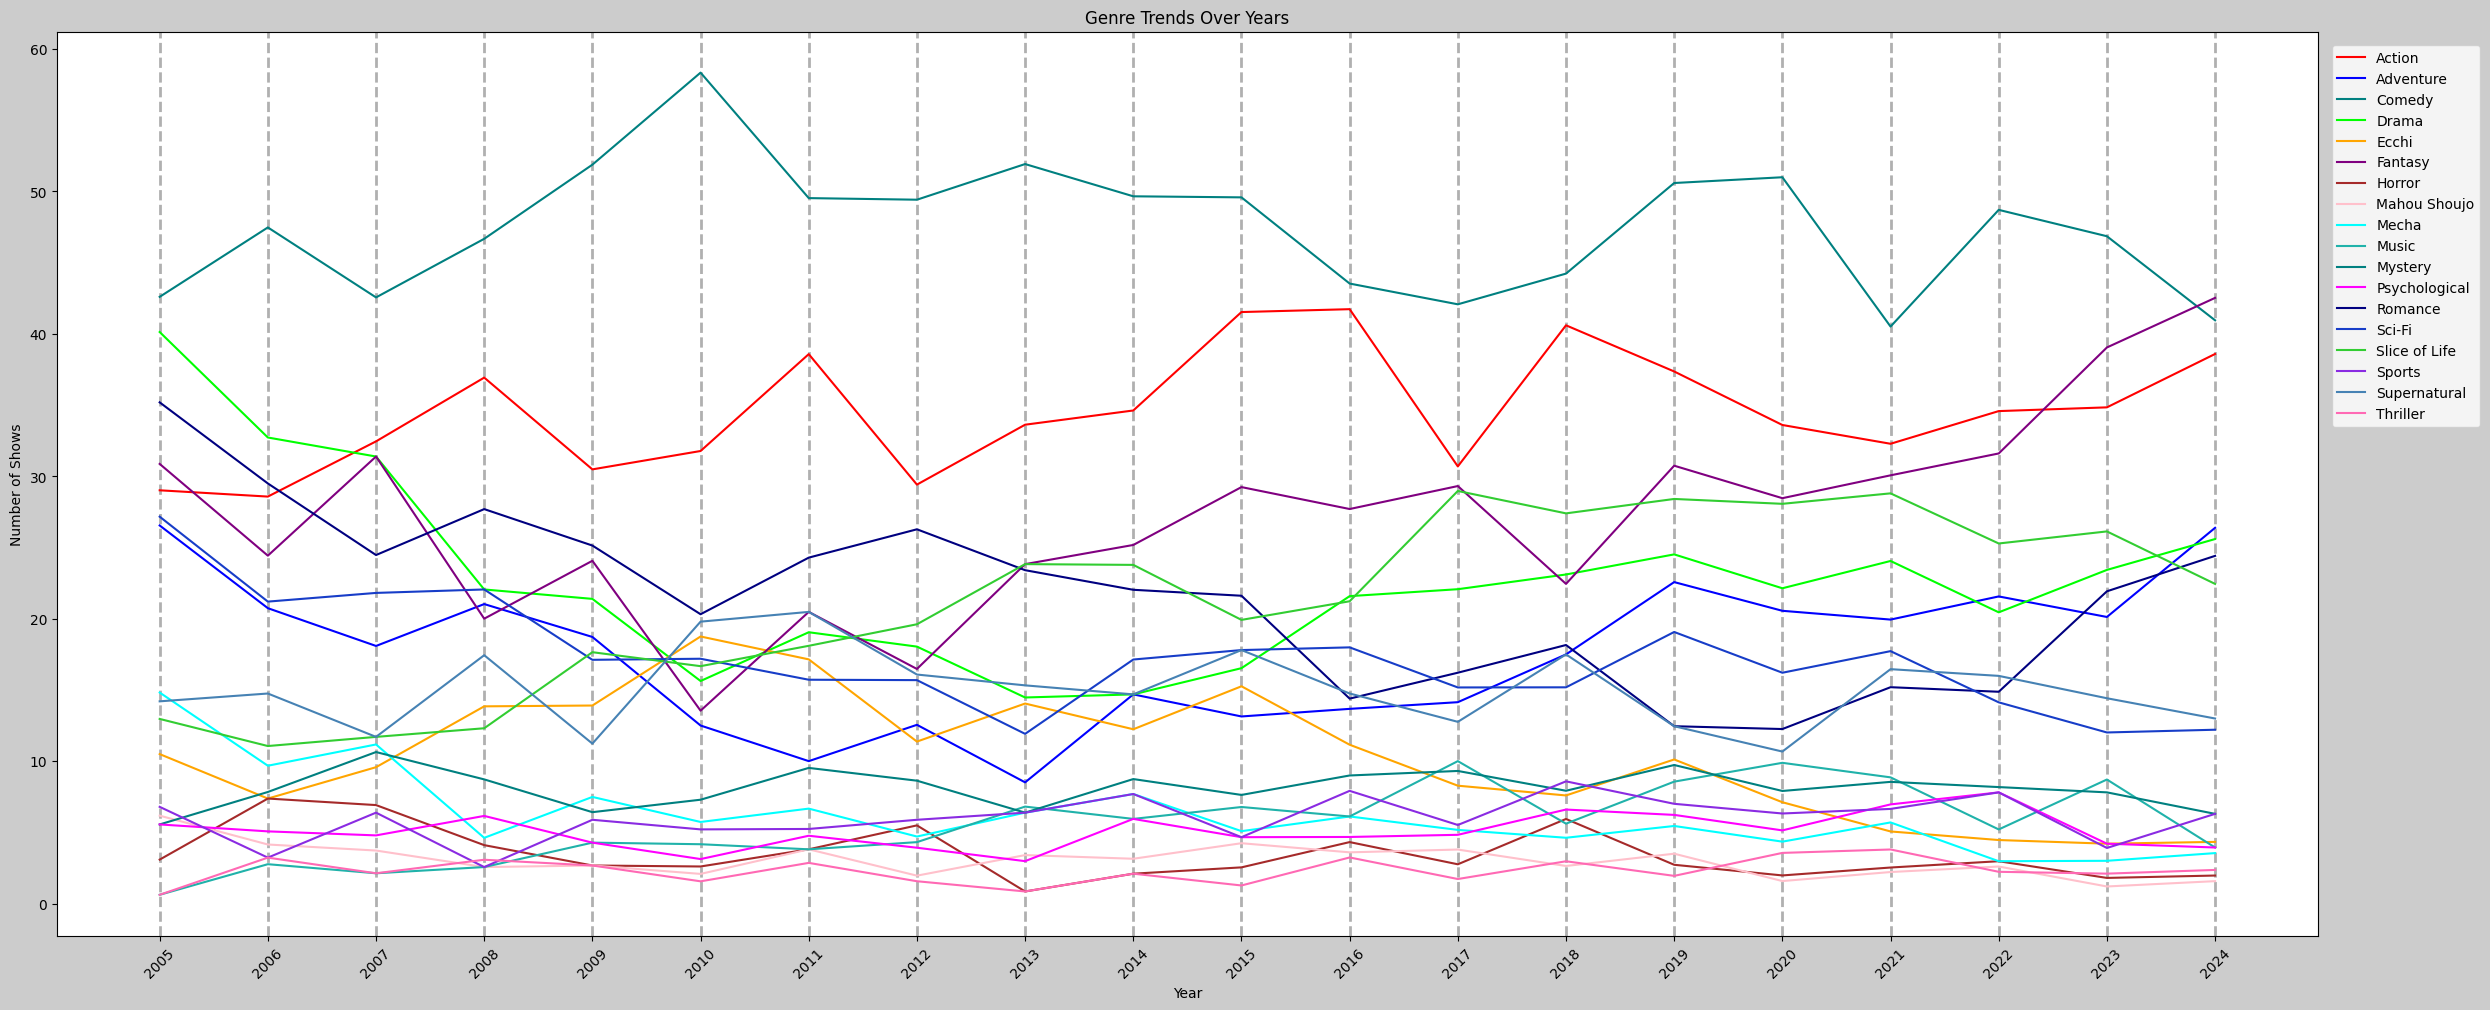

In [49]:
colors = [
    '#FF0000',
    '#0000FF',
    '#008080',
    '#00FF00',
    '#FFA500',
    '#800080',
    '#A52A2A',
    '#FFC0CB',
    '#00FFFF',
    '#20B2AA',
    '#008080',
    '#FF00FF',
    '#000080',
    '#173DC8',
    '#32CD32',
    '#8A2BE2',
    '#4682B4',
    '#FF69B4'
    ]
# Plotting
plt.figure(figsize=(25, 10),facecolor='#cccccc')

# Here we use line plot for each genre
for i,tag in enumerate(genre_year_count_merge.columns):
    plt.plot(genre_year_count_merge.index, genre_year_count_merge[tag], label=tag, color=colors[i % len(colors)])

plt.title('Genre Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1.)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=2)

# Adjust layout to prevent clipping of the legend
plt.tight_layout()

plt.xticks(range(min(genre_year_count_merge.index), max(genre_year_count_merge.index) + 1))
plt.xticks(rotation=45)

# Show the plot
plt.show()

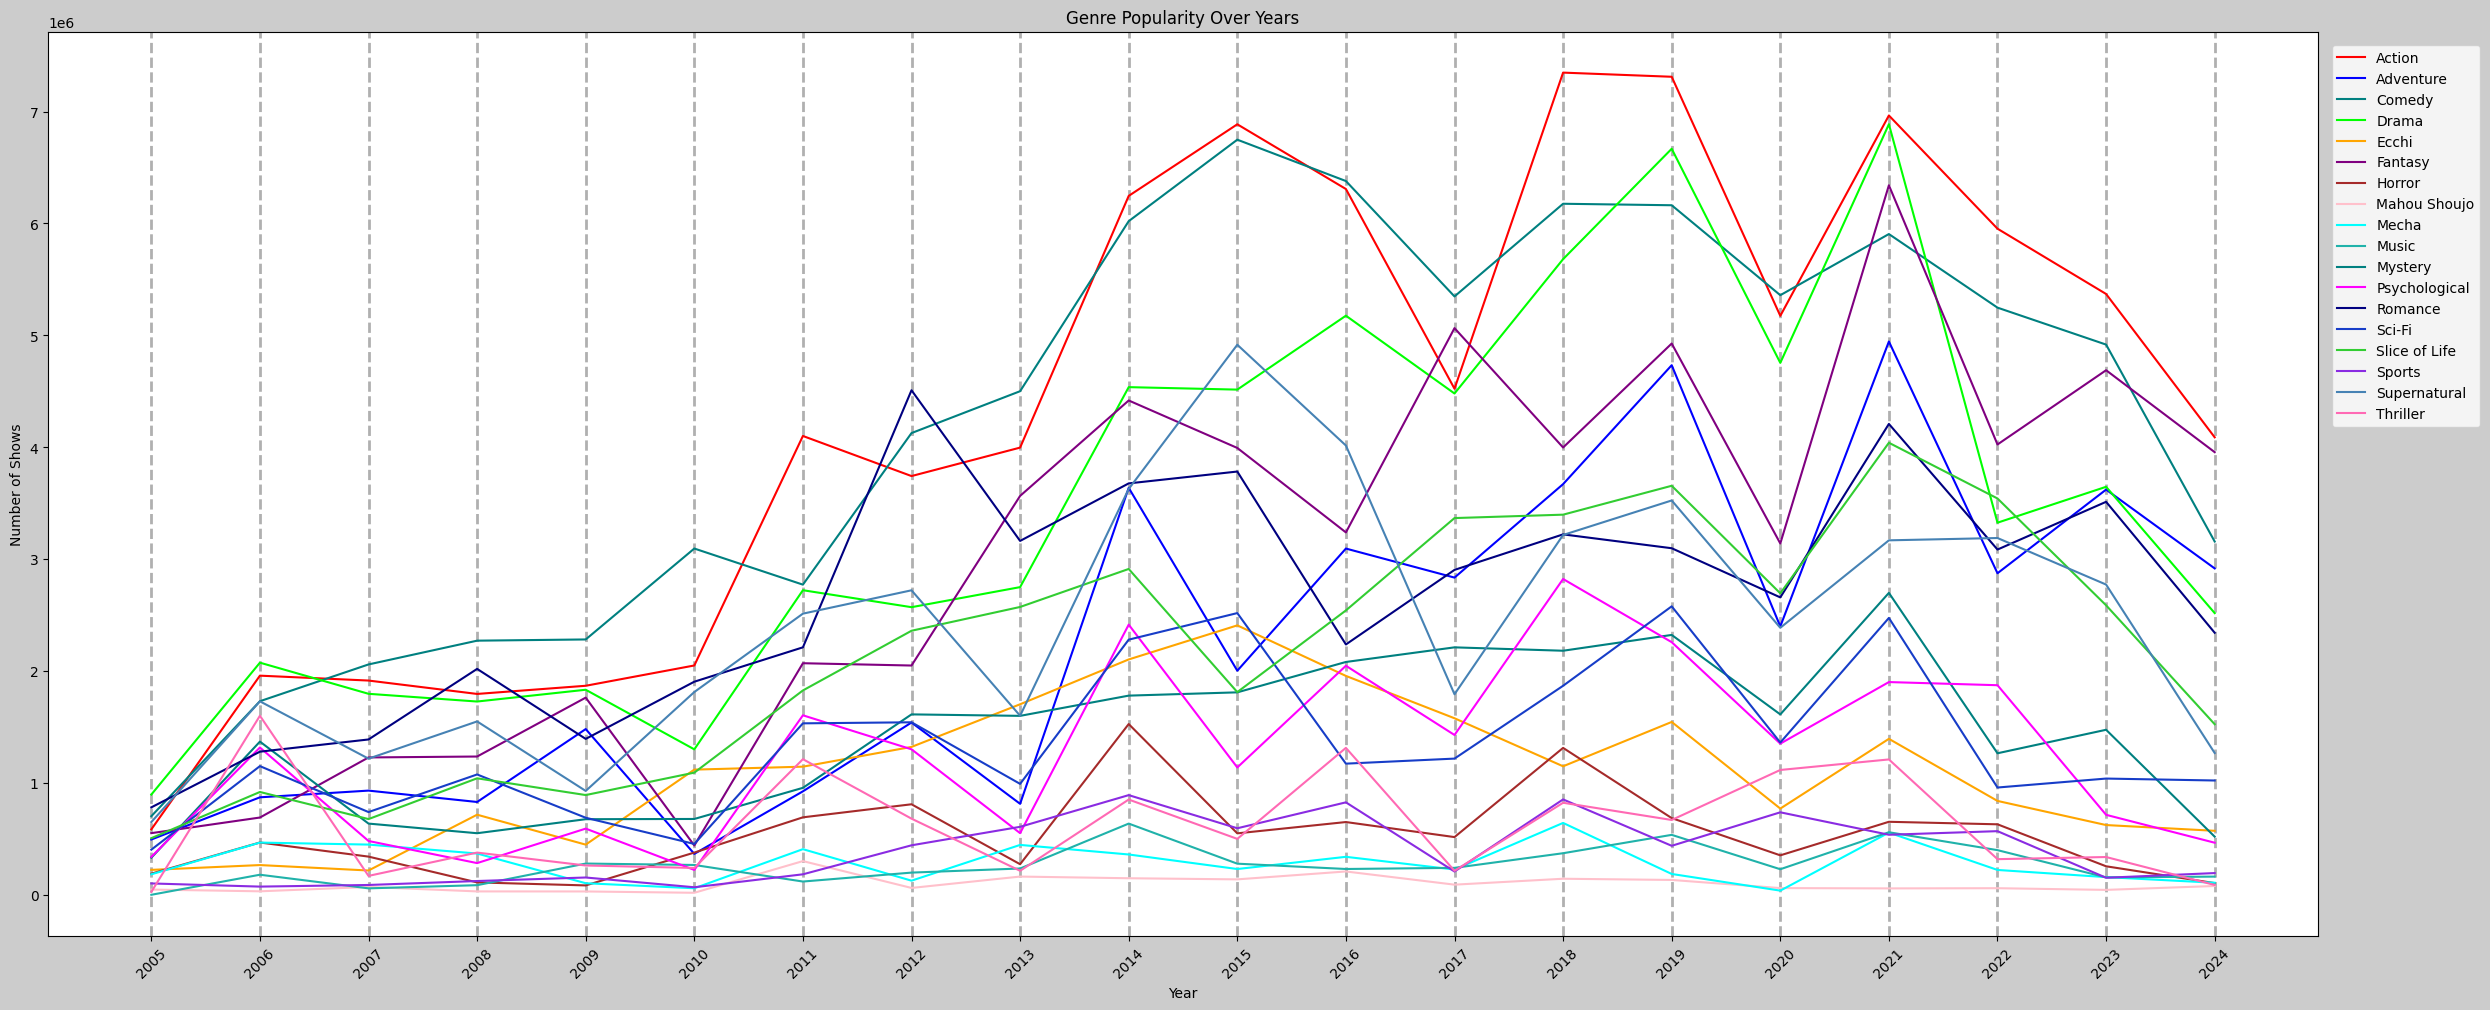

In [50]:
# Pivot the data to have genres as columns and years as index
genre_popularity = df_genres.pivot_table(values='Popularity', index='Year', columns='Genres', aggfunc='sum', fill_value=0)
colors = [
    '#FF0000',
    '#0000FF',
    '#008080',
    '#00FF00',
    '#FFA500',
    '#800080',
    '#A52A2A',
    '#FFC0CB',
    '#00FFFF',
    '#20B2AA',
    '#008080',
    '#FF00FF',
    '#000080',
    '#173DC8',
    '#32CD32',
    '#8A2BE2',
    '#4682B4',
    '#FF69B4'
    ]
# Plotting
plt.figure(figsize=(25, 10),facecolor='#cccccc')

# Here we use line plot for each genre
for i,tag in enumerate(genre_popularity.columns):
    plt.plot(genre_popularity.index, genre_popularity[tag], label=tag, color=colors[i % len(colors)])

plt.title('Genre Popularity Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1.)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=2)

# Adjust layout to prevent clipping of the legend
plt.tight_layout()

plt.xticks(range(min(genre_popularity.index), max(genre_popularity.index) + 1))
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [51]:
genre_popularity.describe()

Genres        Action     Adventure        Comedy         Drama         Ecchi  \
count   2.000000e+01  2.000000e+01  2.000000e+01  2.000000e+01  2.000000e+01   
mean    4.409116e+06  2.248952e+06  4.247909e+06  3.492775e+06  1.104818e+06   
std     2.141426e+06  1.422174e+06  1.838275e+06  1.765590e+06  6.439755e+05   
min     5.848540e+05  3.657520e+05  7.024810e+05  8.960490e+05  2.172290e+05   
25%     2.026776e+06  9.113965e+05  2.649476e+06  2.014135e+06  6.105612e+05   
50%     4.311744e+06  2.200589e+06  4.709003e+06  3.037702e+06  1.131974e+06   
75%     6.261497e+06  3.226152e+06  5.933960e+06  4.591184e+06  1.553071e+06   
max     7.347891e+06  4.944853e+06  6.748511e+06  6.886791e+06  2.407930e+06   

Genres       Fantasy        Horror   Mahou Shoujo          Mecha  \
count   2.000000e+01  2.000000e+01      20.000000      20.000000   
mean    3.068995e+06  5.289792e+05   95670.850000  283811.750000   
std     1.711836e+06  3.756760e+05   71745.520049  172689.011537   
min     4.407060e+05  8.390900e+04   18070.000000   37305.000000   
25%     1.630631e+06  2.687958e+05   46260.000000  150134.750000   
50%     3.401928e+06  4.916260e+05   65723.500000  228137.500000   
75%     4.122852e+06  6.608045e+05  139420.750000  417458.500000   
max     6.340826e+06  1.526131e+06  301345.000000  642466.000000   

Genres          Music       Mystery  Psychological       Romance  \
count       20.000000  2.000000e+01   2.000000e+01  2.000000e+01   
mean    261018.900000  1.418211e+06   1.255177e+06  2.668720e+06   
std     167330.719228  6.956497e+05   7.852006e+05  1.024799e+06   
min        184.000000  3.313940e+05   2.222650e+05  7.815460e+05   
25%     160846.000000  6.772835e+05   5.335398e+05  1.990353e+06   
50%     232956.000000  1.537076e+06   1.308376e+06  2.780863e+06   
75%     302426.000000  1.877280e+06   1.880158e+06  3.293975e+06   
max     636432.000000  2.698366e+06   2.822389e+06  4.509056e+06   

Genres        Sci-Fi  Slice of Life         Sports  Supernatural      Thriller  
count   2.000000e+01   2.000000e+01      20.000000  2.000000e+01  2.000000e+01  
mean    1.353251e+06   2.197903e+06  392061.650000  2.429710e+06  6.110824e+05  
std     6.688255e+05   1.103647e+06  290127.085719  1.129997e+06  4.684364e+05  
min     4.033580e+05   5.061050e+05   67396.000000  6.502450e+05  2.580200e+04  
25%     9.832702e+05   1.079178e+06  145084.000000  1.587528e+06  2.336678e+05  
50%     1.161100e+06   2.450746e+06  323162.500000  2.449518e+06  4.385515e+05  
75%     1.623358e+06   3.025823e+06  597914.750000  3.195422e+06  9.174770e+05  
max     2.578056e+06   4.040008e+06  890825.000000  4.915869e+06  1.600196e+06

In [52]:
select_tags = pd.read_sql_query(
    '''
    SELECT a.Id, a.Title, a.Year, a.Tags
    FROM anilist AS a
    RIGHT JOIN myanilist AS m
    ON a.id = m.mediaId
    WHERE Year > 2004 AND Year <= 2024;
    ''',
    con
)

In [53]:
select_tags

Id                                              Title  Year  \
0         79                                           SHUFFLE!  2005   
1        101                                                Air  2005   
2        184                            Xenosaga: The Animation  2005   
3        291                   D.C.S.S. ~Da Capo Second Season~  2005   
4        355                                  Shakugan no Shana  2005   
...      ...                                                ...   ...   
1246  176311               Blue Exorcist -Beyond the Snow Saga-  2024   
1247  176660          Sengoku Youko: The Thousandfold Chaos Arc  2024   
1248  177104  The Most Notorious "Talker" Runs the World's G...  2024   
1249  178434  As a Reincarnated Aristocrat, I'll Use My Appr...  2024   
1250  178533                                    Ranma1/2 (2024)  2024   

                                                   Tags  
0     [{'name': 'Female Harem'}, {'name': 'Gods'}, {...  
1     [{'name': 'Tragedy'}, {'name': 'Magic'}, {'nam...  
2     [{'name': 'Aliens'}, {'name': 'Artificial Inte...  
3     [{'name': 'Female Harem'}, {'name': 'School'},...  
4     [{'name': 'Super Power'}, {'name': 'Urban Fant...  
...                                                 ...  
1246  [{'name': 'Twins'}, {'name': 'Demons'}, {'name...  
1247  [{'name': 'Youkai'}, {'name': 'Gods'}, {'name'...  
1248  [{'name': 'Anti-Hero'}, {'name': 'Super Power'...  
1249  [{'name': 'Military'}, {'name': 'Politics'}, {...  
1250  [{'name': 'Gender Bending'}, {'name': 'Arrange...  

[1251 rows x 4 columns]

In [54]:
select_tags['Tags'] = select_tags['Tags'].explode()

In [55]:
select_tags['Tags'] = select_tags['Tags'].apply(literal_eval)

In [56]:
select_tags_2 = select_tags.explode('Tags')
select_tags_2

Id            Title  Year                       Tags
0         79         SHUFFLE!  2005   {'name': 'Female Harem'}
0         79         SHUFFLE!  2005           {'name': 'Gods'}
0         79         SHUFFLE!  2005         {'name': 'Demons'}
0         79         SHUFFLE!  2005   {'name': 'Heterosexual'}
0         79         SHUFFLE!  2005  {'name': 'Urban Fantasy'}
...      ...              ...   ...                        ...
1250  178533  Ranma1/2 (2024)  2024         {'name': 'Nudity'}
1250  178533  Ranma1/2 (2024)  2024       {'name': 'Bisexual'}
1250  178533  Ranma1/2 (2024)  2024    {'name': 'Ice Skating'}
1250  178533  Ranma1/2 (2024)  2024           {'name': 'Feet'}
1250  178533  Ranma1/2 (2024)  2024      {'name': 'Wrestling'}

[20133 rows x 4 columns]

In [57]:
select_tags_3 = select_tags_2.dropna(subset=['Tags'])

In [58]:
select_tags_3['Tag'] = select_tags_3['Tags'].apply(lambda x : x['name'])

C:\Users\Leolion023\AppData\Local\Temp\ipykernel_132684\1034971285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_tags_3['Tag'] = select_tags_3['Tags'].apply(lambda x : x['name'])


In [59]:
select_tags_3.drop('Tags', axis=1)

Id            Title  Year            Tag
0         79         SHUFFLE!  2005   Female Harem
0         79         SHUFFLE!  2005           Gods
0         79         SHUFFLE!  2005         Demons
0         79         SHUFFLE!  2005   Heterosexual
0         79         SHUFFLE!  2005  Urban Fantasy
...      ...              ...   ...            ...
1250  178533  Ranma1/2 (2024)  2024         Nudity
1250  178533  Ranma1/2 (2024)  2024       Bisexual
1250  178533  Ranma1/2 (2024)  2024    Ice Skating
1250  178533  Ranma1/2 (2024)  2024           Feet
1250  178533  Ranma1/2 (2024)  2024      Wrestling

[20132 rows x 4 columns]

In [60]:
select_tags_4 = select_tags_3.groupby('Tag').Title.count().reset_index()

In [61]:
select_tags_4

Tag  Title
0              Achromatic      7
1    Achronological Order     55
2              Acrobatics      1
3                  Acting     42
4                Adoption     56
..                    ...    ...
335                Yakuza     18
336               Yandere    112
337                Youkai     51
338                  Yuri     66
339                Zombie     37

[340 rows x 2 columns]

In [62]:
relevant_tags = [
    'School',
    'Otaku Culture',
    'Love Triangle', 
    'Coming of Age',
    'Cute Girls Doing Cute Things',
    'Isekai',
    'Reincarnation',
    'Iyashikei',
    'Primarily Adult Cast'
    ]

In [63]:
select_tags_5 = select_tags_3[select_tags_3['Tag'].isin(relevant_tags)]
select_tags_5 = select_tags_5.drop('Tags', axis=1)
select_tags_5

Id                                              Title  Year  \
0         79                                           SHUFFLE!  2005   
1        101                                                Air  2005   
3        291                   D.C.S.S. ~Da Capo Second Season~  2005   
3        291                   D.C.S.S. ~Da Capo Second Season~  2005   
4        355                                  Shakugan no Shana  2005   
...      ...                                                ...   ...   
1249  178434  As a Reincarnated Aristocrat, I'll Use My Appr...  2024   
1249  178434  As a Reincarnated Aristocrat, I'll Use My Appr...  2024   
1249  178434  As a Reincarnated Aristocrat, I'll Use My Appr...  2024   
1250  178533                                    Ranma1/2 (2024)  2024   
1250  178533                                    Ranma1/2 (2024)  2024   

                Tag  
0            School  
1     Reincarnation  
3            School  
3     Love Triangle  
4     Love Triangle  
...             ...  
1249  Coming of Age  
1249         Isekai  
1249  Reincarnation  
1250  Love Triangle  
1250         School  

[1888 rows x 4 columns]

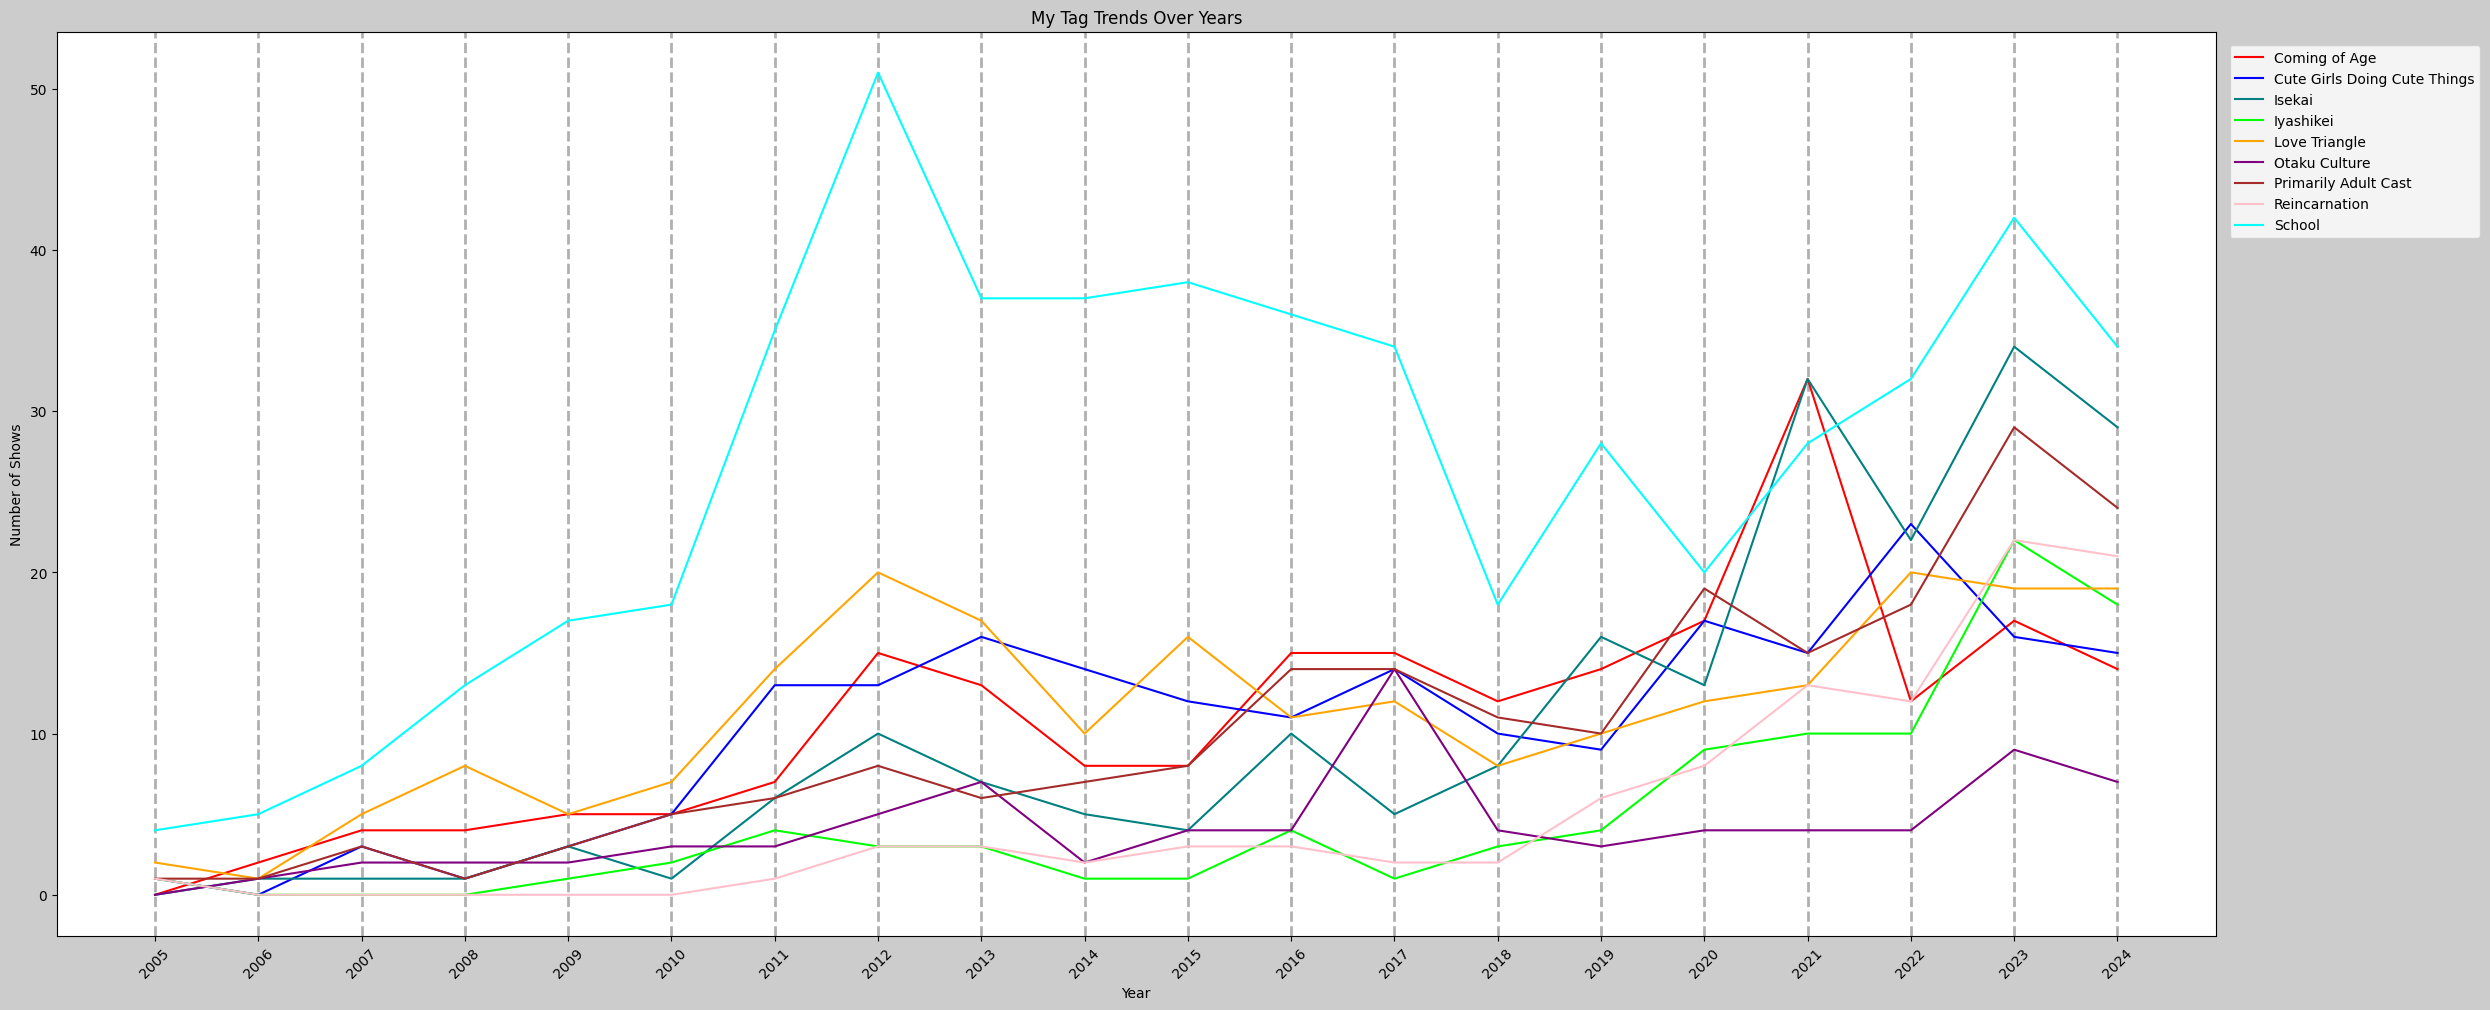

In [64]:
# Pivot the data to have tag as columns and years as index
my_tag_trends = select_tags_5.pivot_table(values='Title', index='Year', columns='Tag', aggfunc='count', fill_value=0)
colors = [
    '#FF0000',
    '#0000FF',
    '#008080',
    '#00FF00',
    '#FFA500',
    '#800080',
    '#A52A2A',
    '#FFC0CB',
    '#00FFFF',
    ]
# Plotting
plt.figure(figsize=(25, 10),facecolor='#cccccc')

# Here we use line plot for each tag
for i,tag in enumerate(my_tag_trends.columns):
    plt.plot(my_tag_trends.index, my_tag_trends[tag], label=tag, color=colors[i % len(colors)])

plt.title('My Tag Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1.)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=2)

# Adjust layout to prevent clipping of the legend
plt.tight_layout()

plt.xticks(range(min(my_tag_trends.index), max(my_tag_trends.index) + 1))
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [65]:
df_2['Tags'] = df_2['Tags'].apply(literal_eval)
df_2

C:\Users\Leolion023\AppData\Local\Temp\ipykernel_132684\395778156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Tags'] = df_2['Tags'].apply(literal_eval)


Id Format  Year       Source  \
5          15     TV  2005        MANGA   
6          16     TV  2005        MANGA   
16         27     TV  2005  LIGHT_NOVEL   
30         50     TV  2005        MANGA   
45         65     TV  2005        MANGA   
...       ...    ...   ...          ...   
18283  185463    ONA  2023     ORIGINAL   
18287  185541    ONA  2024     ORIGINAL   
18293  185642    ONA  2023     ORIGINAL   
18294  185644     TV  2024        OTHER   
18299  185669    ONA  2024     ORIGINAL   

                                              Genres  Popularity  \
5                           [Action, Comedy, Sports]       29079   
6            [Comedy, Drama, Romance, Slice of Life]       50455   
16     [Action, Drama, Horror, Sci-Fi, Supernatural]       23424   
30                   [Comedy, Romance, Supernatural]       21661   
45                           [Action, Comedy, Drama]       14749   
...                                              ...         ...   
18283                         [Drama, Psychological]         361   
18287                                    [Adventure]         124   
18293                         [Horror, Supernatural]          90   
18294                     [Comedy, Fantasy, Mystery]          22   
18299                         [Horror, Supernatural]          70   

                                                    Tags  \
5      [{'name': 'American Football'}, {'name': 'Shou...   
6      [{'name': 'Coming of Age'}, {'name': 'Josei'},...   
16     [{'name': 'Vampire'}, {'name': 'Male Protagoni...   
30     [{'name': 'Magic'}, {'name': 'Primarily Female...   
45     [{'name': 'Battle Royale'}, {'name': 'Magic'},...   
...                                                  ...   
18283                                                 []   
18287                                                 []   
18293                                                 []   
18294                                                 []   
18299                                                 []   

                                         Title  
5                                 Eyeshield 21  
6                             Honey and Clover  
16                               Trinity Blood  
30                         Oh! My Goddess (TV)  
45                      Rozen Maiden: Dreaming  
...                                        ...  
18283  Artiswitch: Ruru's Episodes of Memories  
18287                Future Folktales Season 2  
18293                Nanashi Kaidan 2nd Season  
18294                          Oshiri Tantei 8  
18299                Nanashi Kaidan 3rd Season  

[4916 rows x 8 columns]

In [66]:
df_3 = df_2.explode('Tags')
df_3 = df_3.dropna(subset=['Tags'])
df_3['Tag'] = df_3['Tags'].apply(lambda x : x['name'])
df_3 = df_3.drop('Tags', axis=1)
df_3

Id Format  Year    Source                    Genres  Popularity  \
5          15     TV  2005     MANGA  [Action, Comedy, Sports]       29079   
5          15     TV  2005     MANGA  [Action, Comedy, Sports]       29079   
5          15     TV  2005     MANGA  [Action, Comedy, Sports]       29079   
5          15     TV  2005     MANGA  [Action, Comedy, Sports]       29079   
5          15     TV  2005     MANGA  [Action, Comedy, Sports]       29079   
...       ...    ...   ...       ...                       ...         ...   
18264  184761    ONA  2023  ORIGINAL       [Adventure, Comedy]          15   
18264  184761    ONA  2023  ORIGINAL       [Adventure, Comedy]          15   
18264  184761    ONA  2023  ORIGINAL       [Adventure, Comedy]          15   
18264  184761    ONA  2023  ORIGINAL       [Adventure, Comedy]          15   
18266  184812     TV  2024     OTHER                  [Comedy]          58   

                                Title                  Tag  
5                        Eyeshield 21    American Football  
5                        Eyeshield 21              Shounen  
5                        Eyeshield 21     Male Protagonist  
5                        Eyeshield 21               School  
5                        Eyeshield 21  Primarily Male Cast  
...                               ...                  ...  
18264  Ryan's World Island Adventures          Family Life  
18264  Ryan's World Island Adventures     Anthropomorphism  
18264  Ryan's World Island Adventures              Animals  
18264  Ryan's World Island Adventures              Coastal  
18266                   Gendai Goyaku          Educational  

[49795 rows x 8 columns]

In [67]:
df_4 = df_3.groupby('Tag').Title.count().reset_index()
df_4

Tag  Title
0              Achromatic     22
1    Achronological Order    102
2              Acrobatics      6
3                  Acting    111
4                Adoption    114
..                    ...    ...
362               Yandere    169
363                Youkai    161
364                  Yuri    137
365                Zombie     92
366             Zoophilia      1

[367 rows x 2 columns]

In [68]:
relevant_tags_df = df_3[df_3['Tag'].isin(relevant_tags)]
relevant_tags_df

Id Format  Year    Source                                   Genres  \
5          15     TV  2005     MANGA                 [Action, Comedy, Sports]   
5          15     TV  2005     MANGA                 [Action, Comedy, Sports]   
6          16     TV  2005     MANGA  [Comedy, Drama, Romance, Slice of Life]   
6          16     TV  2005     MANGA  [Comedy, Drama, Romance, Slice of Life]   
6          16     TV  2005     MANGA  [Comedy, Drama, Romance, Slice of Life]   
...       ...    ...   ...       ...                                      ...   
17875  179126    ONA  2024     MANGA  [Comedy, Ecchi, Fantasy, Slice of Life]   
17875  179126    ONA  2024     MANGA  [Comedy, Ecchi, Fantasy, Slice of Life]   
18050  179919     TV  2024  ORIGINAL           [Drama, Slice of Life, Sports]   
18050  179919     TV  2024  ORIGINAL           [Drama, Slice of Life, Sports]   
18247  184560    ONA  2024     MANGA                  [Comedy, Drama, Sports]   

       Popularity                     Title                   Tag  
5           29079              Eyeshield 21                School  
5           29079              Eyeshield 21         Coming of Age  
6           50455          Honey and Clover         Coming of Age  
6           50455          Honey and Clover  Primarily Adult Cast  
6           50455          Honey and Clover         Love Triangle  
...           ...                       ...                   ...  
17875        2420   Plus-Sized Elf Specials                Isekai  
17875        2420   Plus-Sized Elf Specials  Primarily Adult Cast  
18050       21097  Negative Positive Angler             Iyashikei  
18050       21097  Negative Positive Angler  Primarily Adult Cast  
18247        1353    Rising Impact Season 2                School  

[4359 rows x 8 columns]

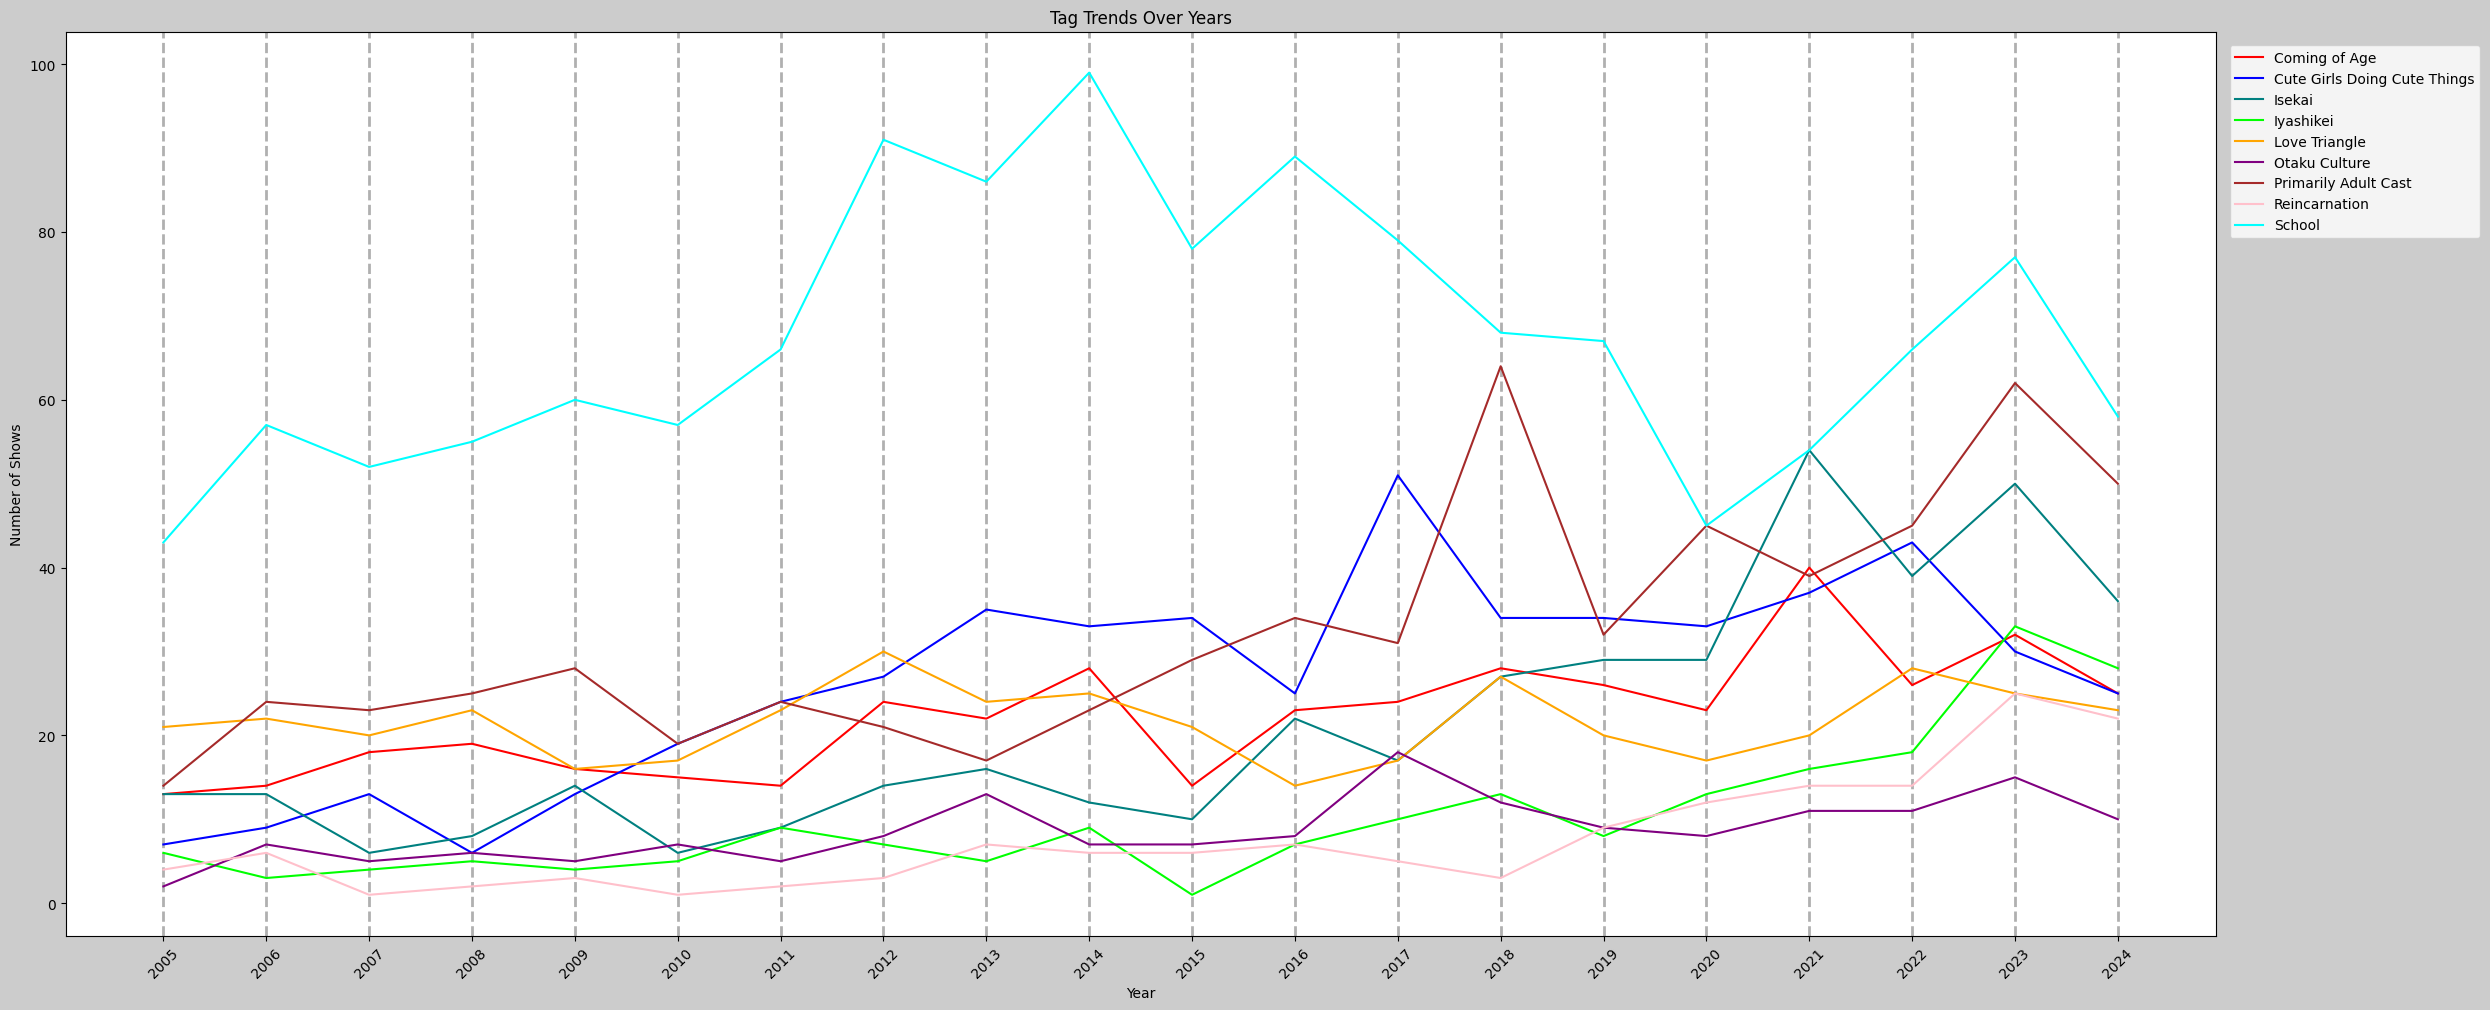

In [69]:
# Pivot the data to have tag as columns and years as index
tag_trends = relevant_tags_df.pivot_table(values='Title', index='Year', columns='Tag', aggfunc='count', fill_value=0)
colors = [
    '#FF0000',
    '#0000FF',
    '#008080',
    '#00FF00',
    '#FFA500',
    '#800080',
    '#A52A2A',
    '#FFC0CB',
    '#00FFFF',
    ]
# Plotting
plt.figure(figsize=(25, 10),facecolor='#cccccc')

# Here we use line plot for each tag
for i,tag in enumerate(tag_trends.columns):
    plt.plot(tag_trends.index, tag_trends[tag], label=tag, color=colors[i % len(colors)])

plt.title('Tag Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1.)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=2)

# Adjust layout to prevent clipping of the legend
plt.tight_layout()

plt.xticks(range(min(tag_trends.index), max(tag_trends.index) + 1))
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [70]:
tag_trends

Tag   Coming of Age  Cute Girls Doing Cute Things  Isekai  Iyashikei  \
Year                                                                   
2005             13                             7      13          6   
2006             14                             9      13          3   
2007             18                            13       6          4   
2008             19                             6       8          5   
2009             16                            13      14          4   
2010             15                            19       6          5   
2011             14                            24       9          9   
2012             24                            27      14          7   
2013             22                            35      16          5   
2014             28                            33      12          9   
2015             14                            34      10          1   
2016             23                            25      22          7   
2017             24                            51      17         10   
2018             28                            34      27         13   
2019             26                            34      29          8   
2020             23                            33      29         13   
2021             40                            37      54         16   
2022             26                            43      39         18   
2023             32                            30      50         33   
2024             25                            25      36         28   

Tag   Love Triangle  Otaku Culture  Primarily Adult Cast  Reincarnation  \
Year                                                                      
2005             21              2                    14              4   
2006             22              7                    24              6   
2007             20              5                    23              1   
2008             23              6                    25              2   
2009             16              5                    28              3   
2010             17              7                    19              1   
2011             23              5                    24              2   
2012             30              8                    21              3   
2013             24             13                    17              7   
2014             25              7                    23              6   
2015             21              7                    29              6   
2016             14              8                    34              7   
2017             17             18                    31              5   
2018             27             12                    64              3   
2019             20              9                    32              9   
2020             17              8                    45             12   
2021             20             11                    39             14   
2022             28             11                    45             14   
2023             25             15                    62             25   
2024             23             10                    50             22   

Tag   School  
Year          
2005      43  
2006      57  
2007      52  
2008      55  
2009      60  
2010      57  
2011      66  
2012      91  
2013      86  
2014      99  
2015      78  
2016      89  
2017      79  
2018      68  
2019      67  
2020      45  
2021      54  
2022      66  
2023      77  
2024      58

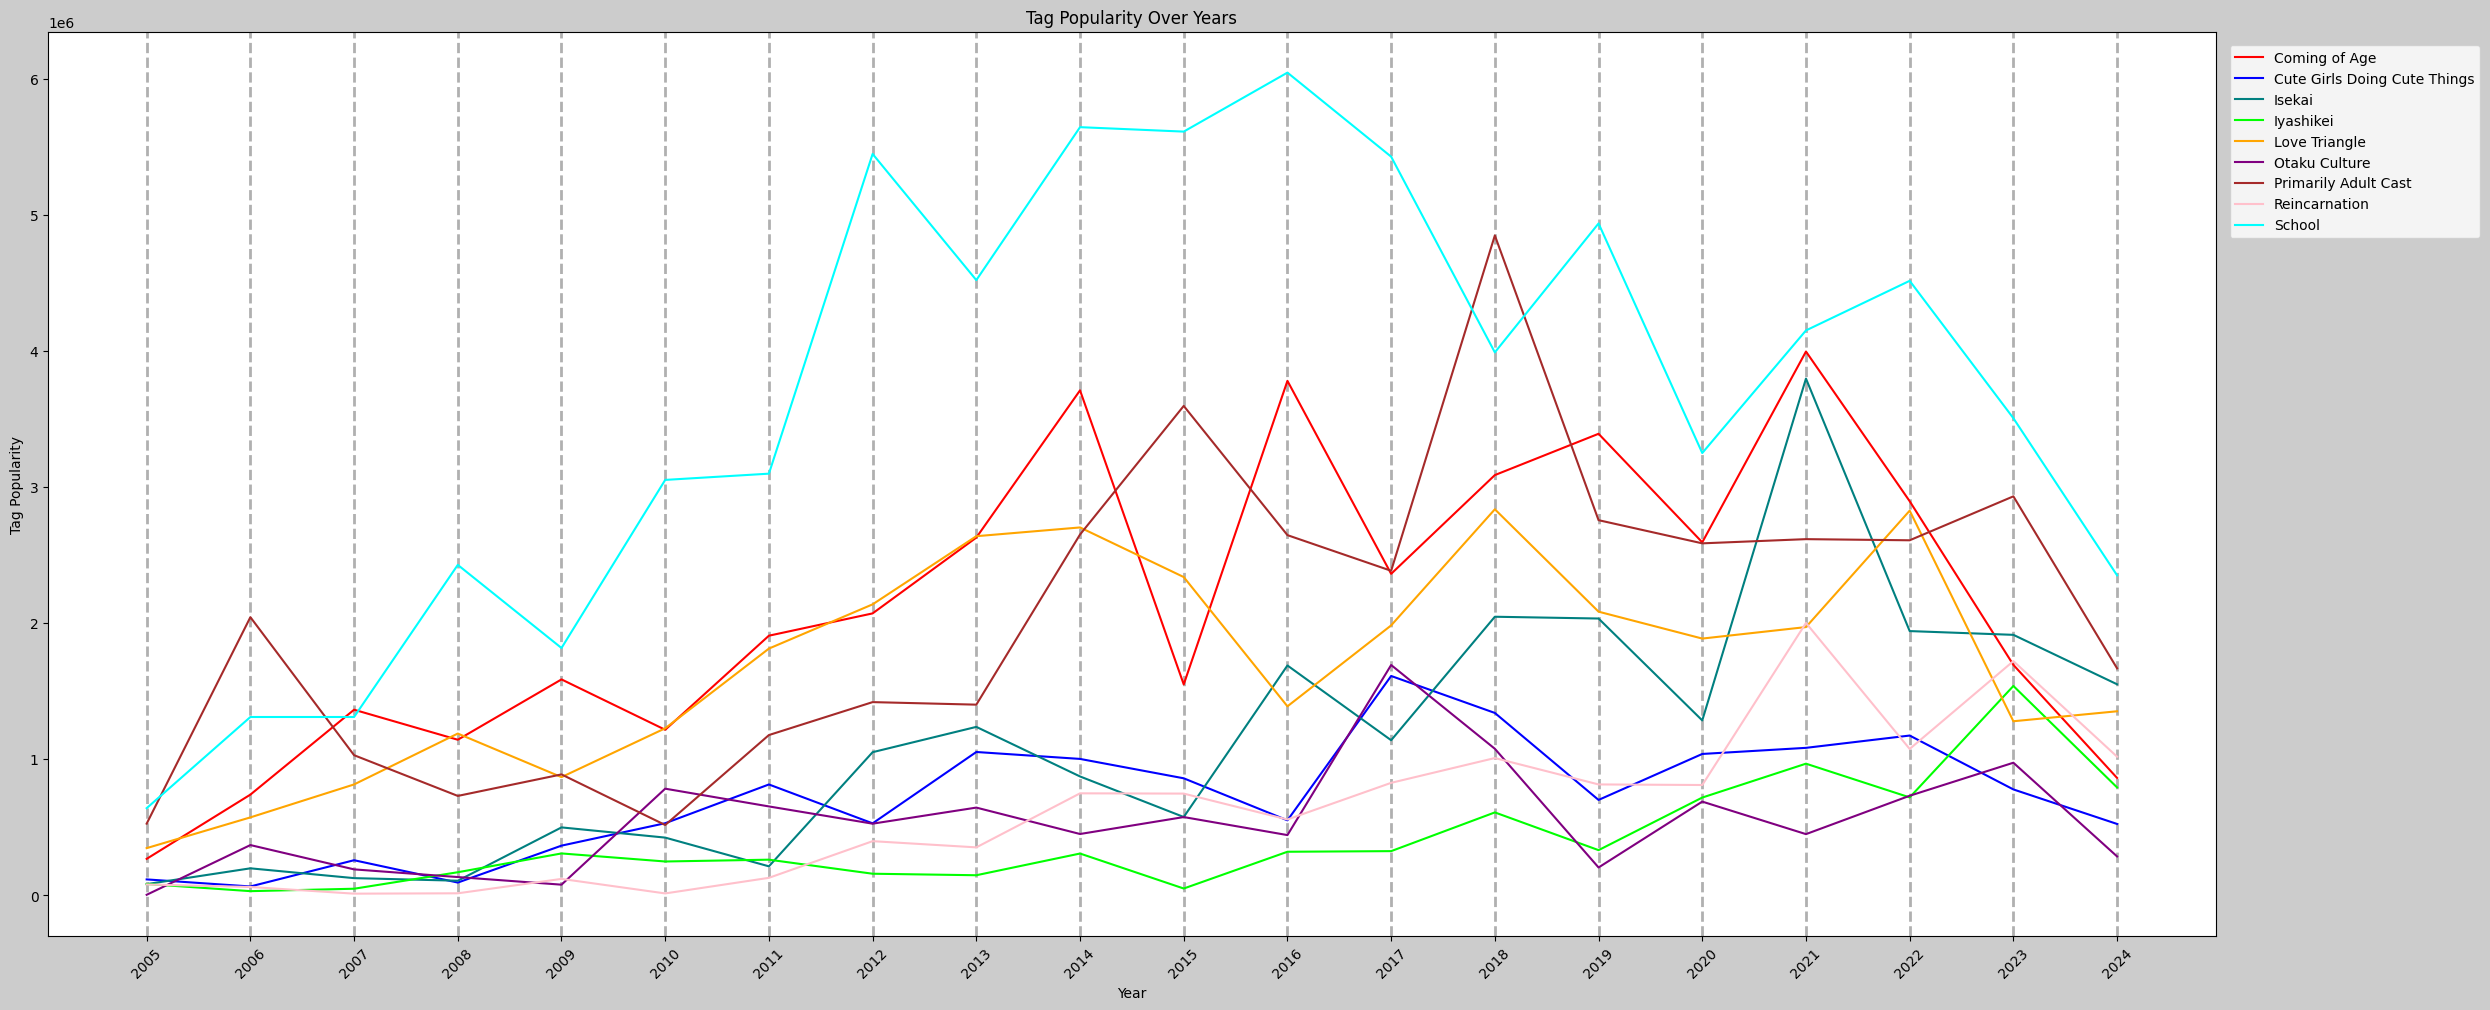

In [71]:
# Pivot the data to have tags as columns and years as index
tag_popularity = relevant_tags_df.pivot_table(values='Popularity', index='Year', columns='Tag', aggfunc='sum', fill_value=0)
colors = [
    '#FF0000',
    '#0000FF',
    '#008080',
    '#00FF00',
    '#FFA500',
    '#800080',
    '#A52A2A',
    '#FFC0CB',
    '#00FFFF',
    ]
# Plotting
plt.figure(figsize=(25, 10),facecolor='#cccccc')

# Here we use line plot for each tag
for i,tag in enumerate(tag_popularity.columns):
    plt.plot(tag_popularity.index, tag_popularity[tag], label=tag, color=colors[i % len(colors)])

plt.title('Tag Popularity Over Years')
plt.xlabel('Year')
plt.ylabel('Tag Popularity')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1.)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=2)

# Adjust layout to prevent clipping of the legend
plt.tight_layout()

plt.xticks(range(min(tag_popularity.index), max(tag_popularity.index) + 1))
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [72]:
tag_popularity.describe()

Tag    Coming of Age  Cute Girls Doing Cute Things        Isekai  \
count   2.000000e+01                  2.000000e+01  2.000000e+01   
mean    2.141955e+06                  7.238694e+05  1.138739e+06   
std     1.090482e+06                  4.296123e+05  9.376941e+05   
min     2.673910e+05                  6.440100e+04  8.160900e+04   
25%     1.326401e+06                  4.838802e+05  3.706855e+05   
50%     1.989141e+06                  7.389070e+05  1.095080e+06   
75%     2.943431e+06                  1.041764e+06  1.744566e+06   
max     3.995466e+06                  1.611190e+06  3.796619e+06   

Tag       Iyashikei  Love Triangle  Otaku Culture  Primarily Adult Cast  \
count  2.000000e+01   2.000000e+01   2.000000e+01          2.000000e+01   
mean   4.061180e+05   1.712416e+06   5.471452e+05          2.050984e+06   
std    3.806315e+05   7.557934e+05   3.951274e+05          1.118856e+06   
min    2.989100e+04   3.461500e+05   3.211000e+03          5.160360e+05   
25%    1.551968e+05   1.216992e+06   2.647620e+05          1.140051e+06   
50%    3.067245e+05   1.849293e+06   4.878610e+05          2.213822e+06   
75%    6.358708e+05   2.187709e+06   6.986965e+05          2.647305e+06   
max    1.537850e+06   2.836279e+06   1.691685e+06          4.848551e+06   

Tag    Reincarnation        School  
count   2.000000e+01  2.000000e+01  
mean    6.249783e+05  3.652344e+06  
std     5.671622e+05  1.636432e+06  
min     1.144300e+04  6.397780e+05  
25%     1.097160e+05  2.408364e+06  
50%     6.517020e+05  3.747368e+06  
75%     8.714408e+05  5.059414e+06  
max     2.001035e+06  6.045095e+06

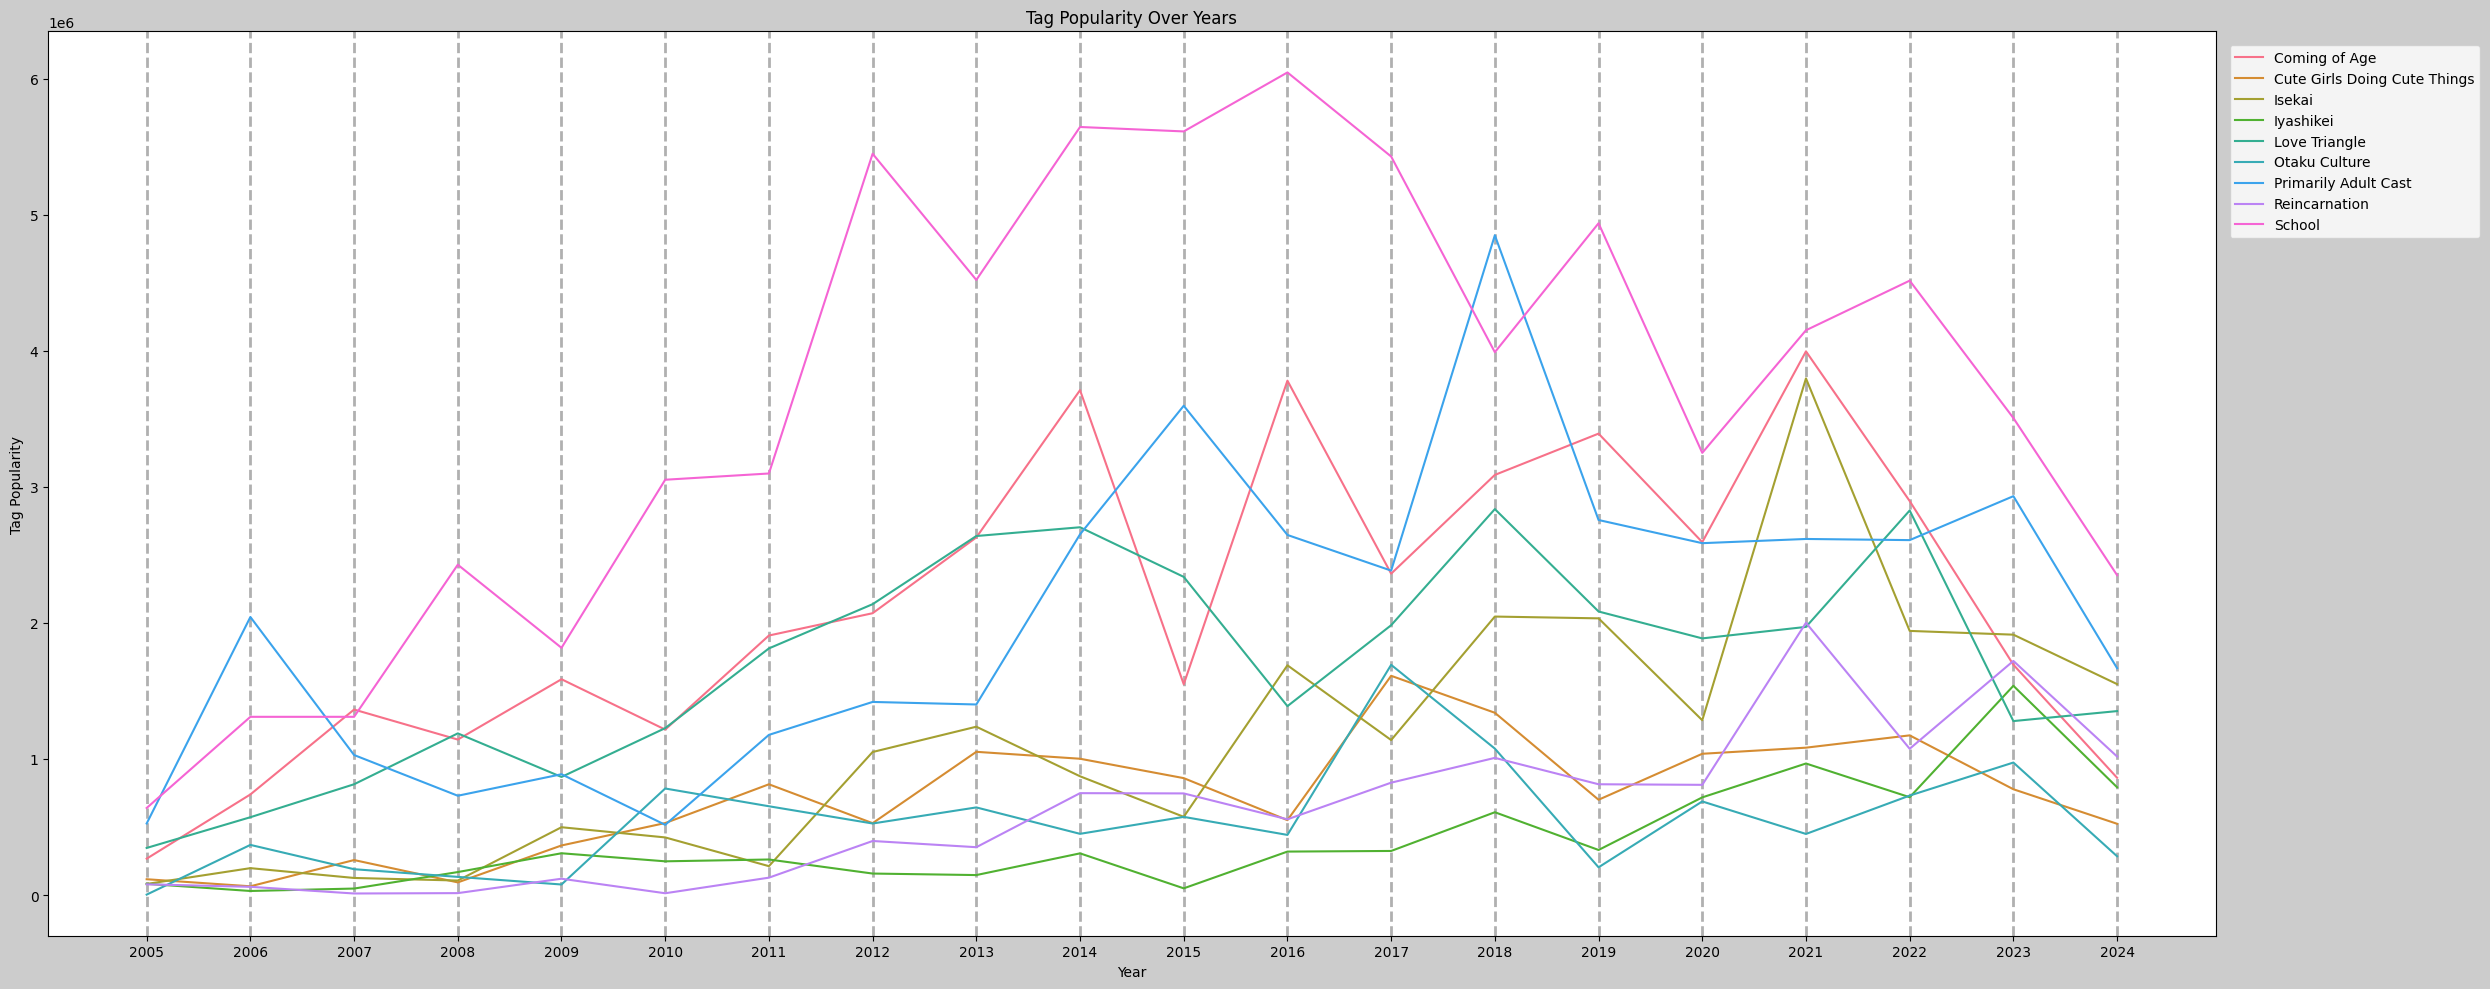

In [73]:
# Pivot the data to have tags as columns and years as index
tag_popularity = relevant_tags_df.pivot_table(values='Popularity', index='Year', columns='Tag', aggfunc='sum', fill_value=0)
colors = sns.color_palette('husl', 9)
# Plotting
plt.figure(figsize=(25, 10),facecolor='#cccccc')

# Here we use line plot for each tag
for i,tag in enumerate(tag_popularity.columns):
    plt.plot(tag_popularity.index, tag_popularity[tag], label=tag, color=colors[i % len(colors)])

plt.title('Tag Popularity Over Years')
plt.xlabel('Year')
plt.ylabel('Tag Popularity')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1.)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=2)

# Adjust layout to prevent clipping of the legend
plt.tight_layout()

plt.xticks(range(min(tag_popularity.index), max(tag_popularity.index) + 1))
plt.xticks(rotation=0)

# Show the plot
plt.show()

In [74]:
tag_year_count_merge = pd.merge(df_year_count, tag_trends, on='Year',how='outer')
tag_year_count_merge

Title  Coming of Age  Cute Girls Doing Cute Things  Isekai  Iyashikei  \
Year                                                                          
2005    162             13                             7      13          6   
2006    217             14                             9      13          3   
2007    188             18                            13       6          4   
2008    195             19                             6       8          5   
2009    187             16                            13      14          4   
2010    192             15                            19       6          5   
2011    210             14                            24       9          9   
2012    255             24                            27      14          7   
2013    235             22                            35      16          5   
2014    286             28                            33      12          9   
2015    236             14                            34      10          1   
2016    278             23                            25      22          7   
2017    290             24                            51      17         10   
2018    303             28                            34      27         13   
2019    257             26                            34      29          8   
2020    253             23                            33      29         13   
2021    316             40                            37      54         16   
2022    269             26                            43      39         18   
2023    333             32                            30      50         33   
2024    254             25                            25      36         28   

      Love Triangle  Otaku Culture  Primarily Adult Cast  Reincarnation  \
Year                                                                      
2005             21              2                    14              4   
2006             22              7                    24              6   
2007             20              5                    23              1   
2008             23              6                    25              2   
2009             16              5                    28              3   
2010             17              7                    19              1   
2011             23              5                    24              2   
2012             30              8                    21              3   
2013             24             13                    17              7   
2014             25              7                    23              6   
2015             21              7                    29              6   
2016             14              8                    34              7   
2017             17             18                    31              5   
2018             27             12                    64              3   
2019             20              9                    32              9   
2020             17              8                    45             12   
2021             20             11                    39             14   
2022             28             11                    45             14   
2023             25             15                    62             25   
2024             23             10                    50             22   

      School  
Year          
2005      43  
2006      57  
2007      52  
2008      55  
2009      60  
2010      57  
2011      66  
2012      91  
2013      86  
2014      99  
2015      78  
2016      89  
2017      79  
2018      68  
2019      67  
2020      45  
2021      54  
2022      66  
2023      77  
2024      58

In [75]:
tag_year_count_merge[['Title','School','Otaku Culture','Love Triangle','Coming of Age','Cute Girls Doing Cute Things','Isekai','Reincarnation','Iyashikei','Primarily Adult Cast']] = tag_year_count_merge[['Title','School','Otaku Culture','Love Triangle','Coming of Age','Cute Girls Doing Cute Things','Isekai','Reincarnation','Iyashikei','Primarily Adult Cast']].apply(lambda x: (x/x[0])*100, axis=1)
tag_year_count_merge

C:\Users\Leolion023\AppData\Local\Temp\ipykernel_132684\1472890272.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tag_year_count_merge[['Title','School','Otaku Culture','Love Triangle','Coming of Age','Cute Girls Doing Cute Things','Isekai','Reincarnation','Iyashikei','Primarily Adult Cast']] = tag_year_count_merge[['Title','School','Otaku Culture','Love Triangle','Coming of Age','Cute Girls Doing Cute Things','Isekai','Reincarnation','Iyashikei','Primarily Adult Cast']].apply(lambda x: (x/x[0])*100, axis=1)


Title  Coming of Age  Cute Girls Doing Cute Things     Isekai  \
Year                                                                  
2005  100.0       8.024691                      4.320988   8.024691   
2006  100.0       6.451613                      4.147465   5.990783   
2007  100.0       9.574468                      6.914894   3.191489   
2008  100.0       9.743590                      3.076923   4.102564   
2009  100.0       8.556150                      6.951872   7.486631   
2010  100.0       7.812500                      9.895833   3.125000   
2011  100.0       6.666667                     11.428571   4.285714   
2012  100.0       9.411765                     10.588235   5.490196   
2013  100.0       9.361702                     14.893617   6.808511   
2014  100.0       9.790210                     11.538462   4.195804   
2015  100.0       5.932203                     14.406780   4.237288   
2016  100.0       8.273381                      8.992806   7.913669   
2017  100.0       8.275862                     17.586207   5.862069   
2018  100.0       9.240924                     11.221122   8.910891   
2019  100.0      10.116732                     13.229572  11.284047   
2020  100.0       9.090909                     13.043478  11.462451   
2021  100.0      12.658228                     11.708861  17.088608   
2022  100.0       9.665428                     15.985130  14.498141   
2023  100.0       9.609610                      9.009009  15.015015   
2024  100.0       9.842520                      9.842520  14.173228   

      Iyashikei  Love Triangle  Otaku Culture  Primarily Adult Cast  \
Year                                                                  
2005   3.703704      12.962963       1.234568              8.641975   
2006   1.382488      10.138249       3.225806             11.059908   
2007   2.127660      10.638298       2.659574             12.234043   
2008   2.564103      11.794872       3.076923             12.820513   
2009   2.139037       8.556150       2.673797             14.973262   
2010   2.604167       8.854167       3.645833              9.895833   
2011   4.285714      10.952381       2.380952             11.428571   
2012   2.745098      11.764706       3.137255              8.235294   
2013   2.127660      10.212766       5.531915              7.234043   
2014   3.146853       8.741259       2.447552              8.041958   
2015   0.423729       8.898305       2.966102             12.288136   
2016   2.517986       5.035971       2.877698             12.230216   
2017   3.448276       5.862069       6.206897             10.689655   
2018   4.290429       8.910891       3.960396             21.122112   
2019   3.112840       7.782101       3.501946             12.451362   
2020   5.138340       6.719368       3.162055             17.786561   
2021   5.063291       6.329114       3.481013             12.341772   
2022   6.691450      10.408922       4.089219             16.728625   
2023   9.909910       7.507508       4.504505             18.618619   
2024  11.023622       9.055118       3.937008             19.685039   

      Reincarnation     School  
Year                            
2005       2.469136  26.543210  
2006       2.764977  26.267281  
2007       0.531915  27.659574  
2008       1.025641  28.205128  
2009       1.604278  32.085561  
2010       0.520833  29.687500  
2011       0.952381  31.428571  
2012       1.176471  35.686275  
2013       2.978723  36.595745  
2014       2.097902  34.615385  
2015       2.542373  33.050847  
2016       2.517986  32.014388  
2017       1.724138  27.241379  
2018       0.990099  22.442244  
2019       3.501946  26.070039  
2020       4.743083  17.786561  
2021       4.430380  17.088608  
2022       5.204461  24.535316  
2023       7.507508  23.123123  
2024       8.661417  22.834646

In [76]:
tag_year_count_merge = tag_year_count_merge.drop('Title', axis=1)

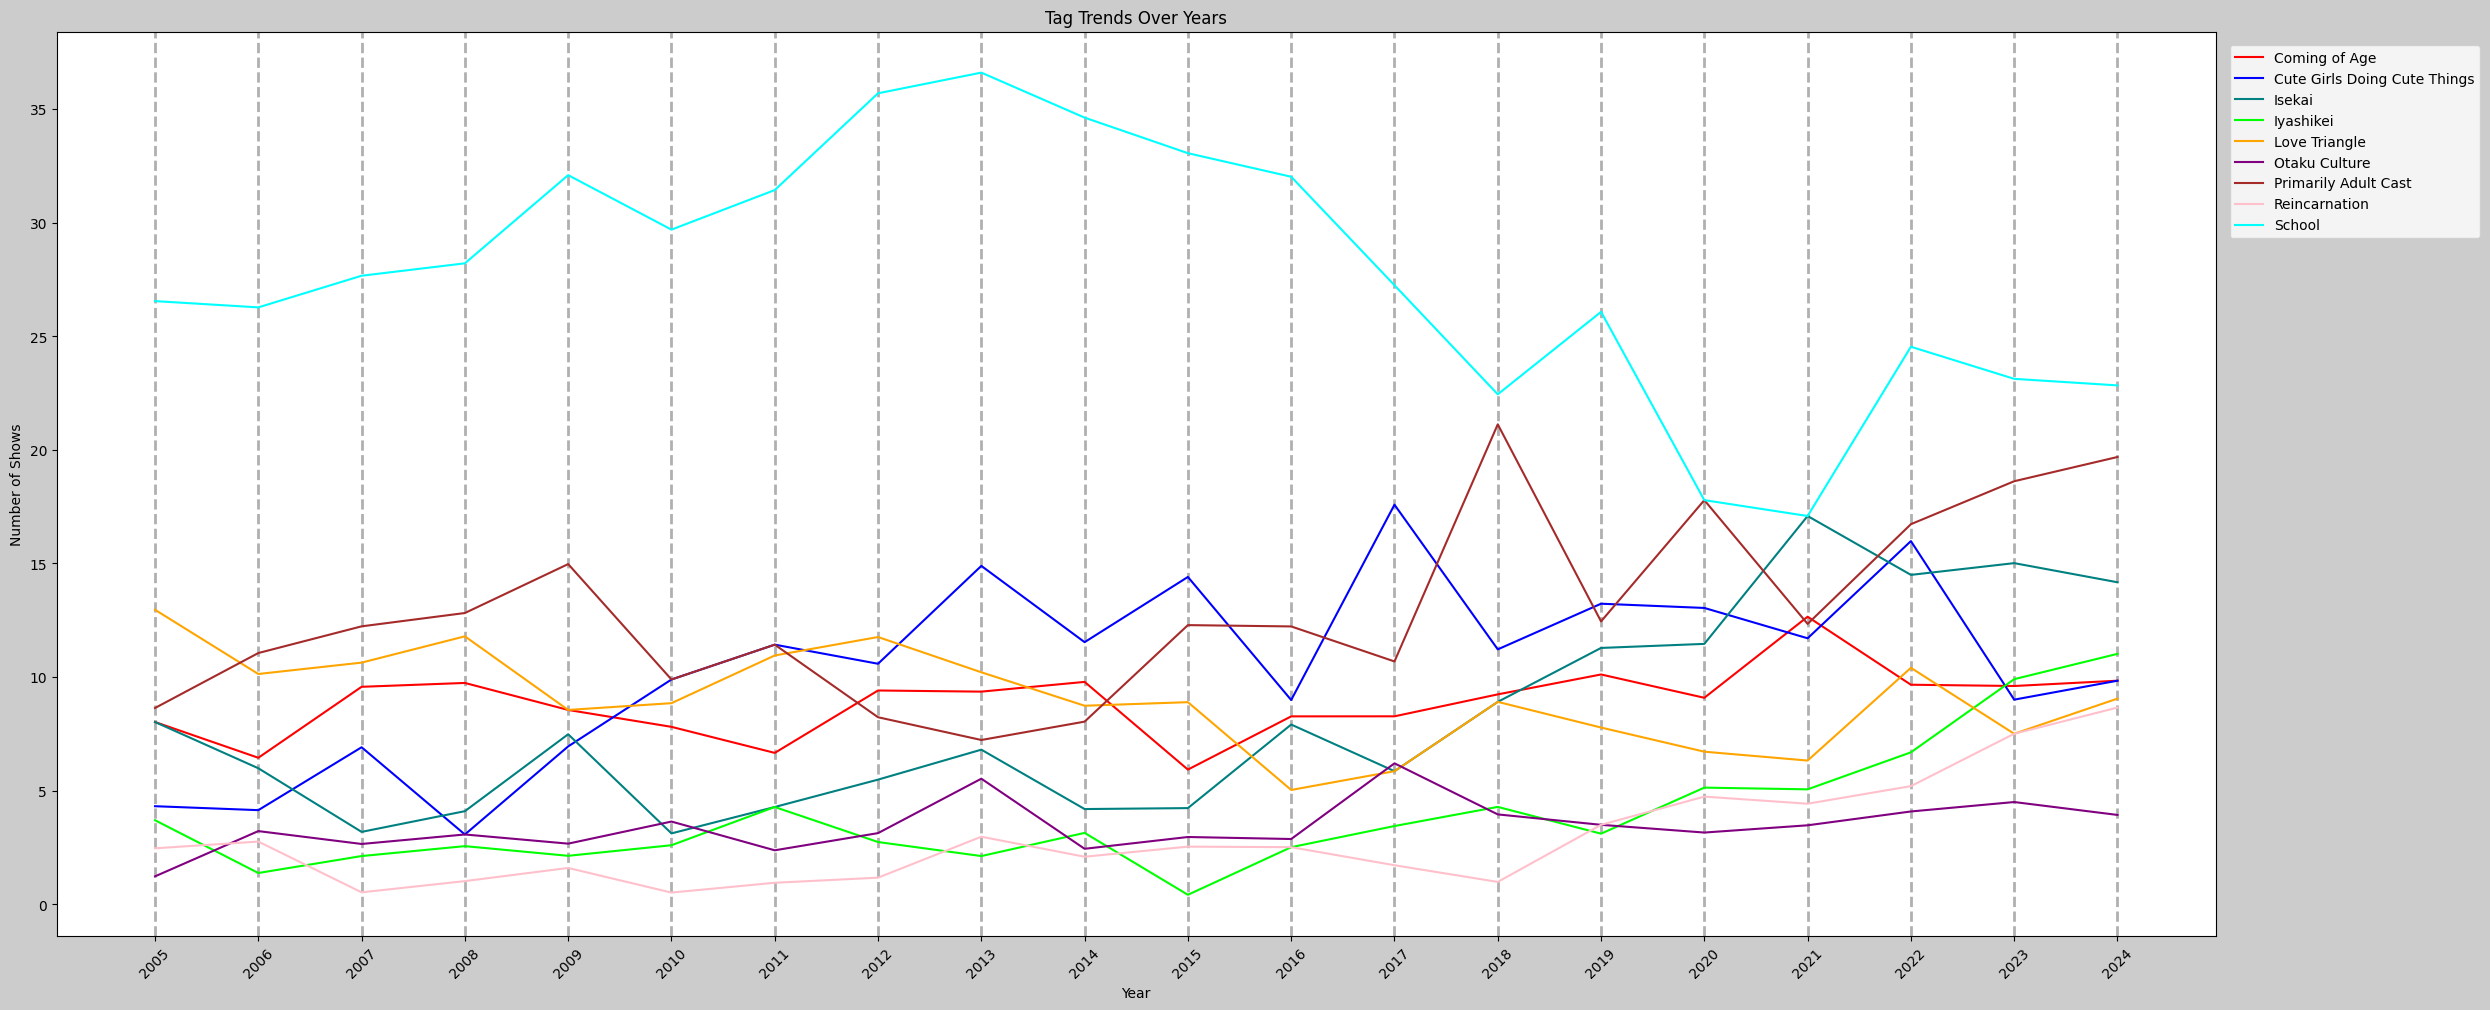

In [77]:
colors = [
    '#FF0000',
    '#0000FF',
    '#008080',
    '#00FF00',
    '#FFA500',
    '#800080',
    '#A52A2A',
    '#FFC0CB',
    '#00FFFF',
    ]
# Plotting
plt.figure(figsize=(25, 10),facecolor='#cccccc')

# Here we use line plot for each tag
for i,tag in enumerate(tag_year_count_merge.columns):
    plt.plot(tag_year_count_merge.index, tag_year_count_merge[tag], label=tag, color=colors[i % len(colors)])

plt.title('Tag Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1.)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=2)

# Adjust layout to prevent clipping of the legend
plt.tight_layout()

plt.xticks(range(min(tag_year_count_merge.index), max(tag_year_count_merge.index) + 1))
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [78]:
tag_year_count_merge.describe()

Coming of Age  Cute Girls Doing Cute Things     Isekai  Iyashikei  \
count      20.000000                     20.000000  20.000000  20.000000   
mean        8.904958                     10.439117   8.157340   3.922318   
std         1.501021                      3.953775   4.330779   2.653477   
min         5.932203                      3.076923   3.125000   0.423729   
25%         8.211209                      8.482572   4.273608   2.423249   
50%         9.301313                     10.904679   7.147571   3.129847   
75%         9.684968                     13.090002  11.328648   4.483645   
max        12.658228                     17.586207  17.088608  11.023622   

       Love Triangle  Otaku Culture  Primarily Adult Cast  Reincarnation  \
count      20.000000      20.000000             20.000000      20.000000   
mean        9.056259       3.435051             12.925375       2.897282   
std         2.105836       1.105148              4.013177       2.238616   
min         5.035971       1.234568              7.234043       0.520833   
25%         7.713453       2.826723             10.491200       1.138763   
50%         8.904598       3.193931             12.261089       2.493561   
75%        10.466266       3.942855             15.412103       3.734054   
max        12.962963       6.206897             21.122112       8.661417   

          School  
count  20.000000  
mean   27.748069  
std     5.499730  
min    17.088608  
25%    24.182268  
50%    27.450477  
75%    32.032182  
max    36.595745